In [1]:
import numpy as np , pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)

# application_data

In [2]:
# Load the application_data
appl_data=pd.read_csv('application_data.csv')

### Sanity check of appl_data

In [3]:
# Print first five rows of appl_data
appl_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
# Shape of appl_data
appl_data.shape 

(307511, 122)

###### appl_data have rows = 307511 & columns=122

In [5]:
# Check info of appl_data
appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Missing Values & Imputation 

In [6]:
# Calculate the missing values percentage in appl_data
100*(appl_data.isnull().mean()).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [7]:
# Find the features with missing values more than 40%
drop_cols = appl_data.columns[(100*(appl_data.isnull().mean()))>=40]

In [8]:
# Check the length of drop_cols
len(drop_cols)

49

In [9]:
# Drop the features with missing values more than 40%
appl_data.drop(drop_cols,axis=1,inplace=True)

In [10]:
# Check the shape of appl_data again
appl_data.shape

(307511, 73)

In [11]:
# Calculate the missing values present in appl_data
100*(appl_data.isnull().mean()).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [12]:
# Lets deal with the features with missing values greater then 0
impute_cols = appl_data.columns[appl_data.isnull().sum()>0]

In [13]:
# Lets check impute_cols
impute_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [14]:
appl_data[impute_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_ANNUITY                 307499 non-null  float64
 1   AMT_GOODS_PRICE             307233 non-null  float64
 2   NAME_TYPE_SUITE             306219 non-null  object 
 3   OCCUPATION_TYPE             211120 non-null  object 
 4   CNT_FAM_MEMBERS             307509 non-null  float64
 5   EXT_SOURCE_2                306851 non-null  float64
 6   EXT_SOURCE_3                246546 non-null  float64
 7   OBS_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 8   DEF_30_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 9   OBS_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 10  DEF_60_CNT_SOCIAL_CIRCLE    306490 non-null  float64
 11  DAYS_LAST_PHONE_CHANGE      307510 non-null  float64
 12  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 13  AMT_REQ_CREDIT

### Lets take some features from impute_cols  and impute values in to the missing values

In [15]:
# Lets take 'OCCUPATION_TYPE' feature
print(f'Missing values in OCCUPATION_TYPE feature: {appl_data.OCCUPATION_TYPE.isnull().sum()}')
appl_data['OCCUPATION_TYPE'].value_counts()

Missing values in OCCUPATION_TYPE feature: 96391


Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

###### Lets impute the missing values with 'Unknown' , because the count of missing value is very high and we don't know the occupation of the client 

In [16]:
# Lets Impute the missing values with 'Unknown' in OCCUPATION_TYPE feature
appl_data['OCCUPATION_TYPE'].fillna('Unknown',inplace=True)

In [17]:
# Lets check the missing values in OCCUPATION_TYPE feature
appl_data['OCCUPATION_TYPE'].isnull().sum()

0

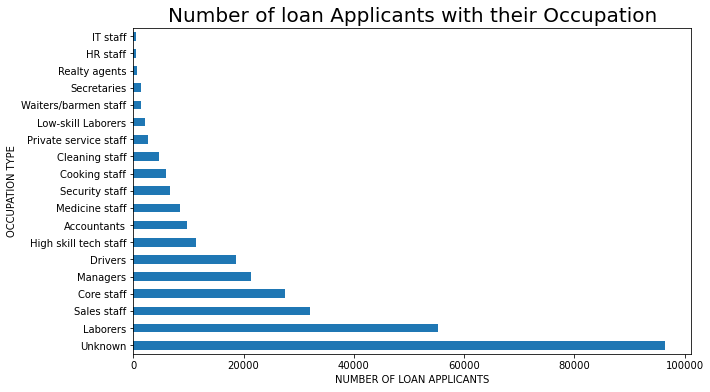

In [18]:
# Lets check the 'OCCUPATION_TYPE' feature
plt.figure(figsize=[10,6])
appl_data['OCCUPATION_TYPE'].value_counts().plot.barh()
plt.xlabel('NUMBER OF LOAN APPLICANTS')
plt.ylabel('OCCUPATION TYPE')
plt.title('Number of loan Applicants with their Occupation',fontdict={'fontsize':20,'fontweight':5})
plt.show()

###### The maximum loan applicants are form unknown occuptation

In [19]:
# Lets take the fetures starts with 'AMT_REQ_'
List1=[i for i in appl_data if i.startswith('AMT_REQ_')]
appl_data[List1].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

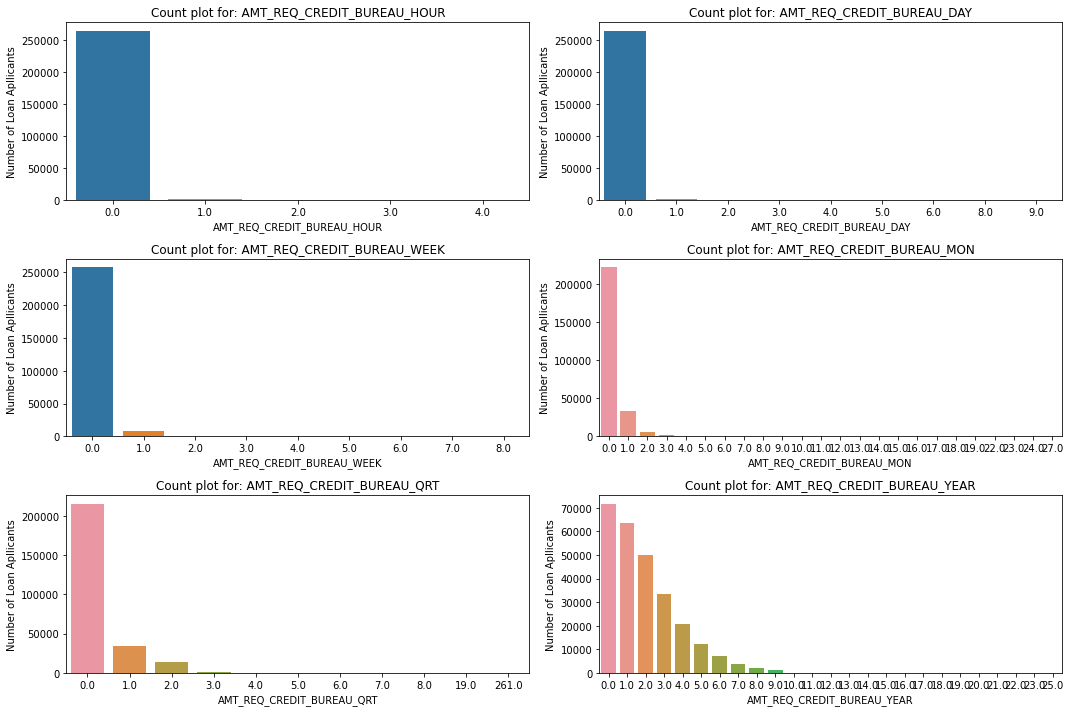

In [20]:
plt.figure(figsize=[15,10])
c=1
for i in List1:
    plt.subplot(3,2,c)
    sns.countplot(appl_data[i])
    plt.xlabel(i)
    plt.ylabel('Number of Loan Apllicants')
    plt.title('Count plot for: '+i)
    c=c+1
plt.tight_layout()
plt.show()

###### From the above plots we got that maximum number of loan applicants  doesn't require any enquiries to Credit the loan amount

In [21]:
# Lets take the fetures ends with '_SOCIAL_CIRCLE'
List2=[i for i in appl_data if i.endswith('_SOCIAL_CIRCLE')]
appl_data[List2].isnull().sum()

OBS_30_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_60_CNT_SOCIAL_CIRCLE    1021
dtype: int64

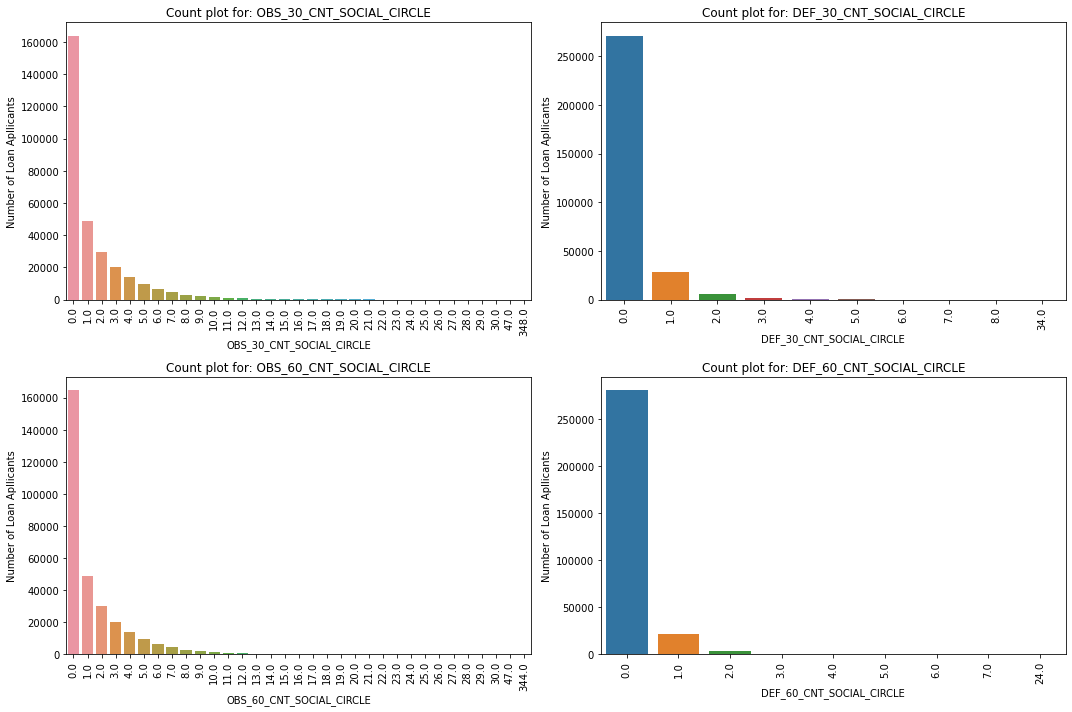

In [22]:
plt.figure(figsize=[15,10])
c=1
for i in List2:
    plt.subplot(2,2,c)
    sns.countplot(appl_data[i])
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.ylabel('Number of Loan Apllicants')
    plt.title('Count plot for: '+i)
    c=c+1
plt.tight_layout()
plt.show()

###### From the above plots we got that maximum number of loan applicants  have 0 observation

### Lets create a new DataFrame for analysis purpose which contains some important features from appl_data

In [23]:
appl_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [24]:
# Lets create a new dataframe
important_cols = ['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','OCCUPATION_TYPE','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
appl_data_new = appl_data[important_cols]

In [25]:
appl_data_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,Laborers,1.0,WEDNESDAY,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,Core staff,2.0,MONDAY,School
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,Laborers,1.0,MONDAY,Government
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,Laborers,2.0,WEDNESDAY,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,Core staff,1.0,THURSDAY,Religion


In [26]:
appl_data_new.shape

(307511, 21)

In [27]:
appl_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   AMT_INCOME_TOTAL            307511 non-null  float64
 7   AMT_CREDIT                  307511 non-null  float64
 8   AMT_ANNUITY                 307499 non-null  float64
 9   AMT_GOODS_PRICE             307233 non-null  float64
 10  NAME_TYPE_SUITE             306219 non-null  object 
 11  NAME_INCOME_TYPE            307511 non-null  object 
 12  NAME_EDUCATION_TYPE         307511 non-null  object 
 13  NAME_FAMILY_ST

In [28]:
# DAYS_BIRTH' & 'DAYS_EMPLOYED' feature contains negative value, so lets convert the negative values to absolute values
appl_data_new['DAYS_BIRTH'] = appl_data_new['DAYS_BIRTH'].apply(lambda x: abs(x))
appl_data_new['DAYS_EMPLOYED'] = appl_data_new['DAYS_EMPLOYED'].apply(lambda x: abs(x))

In [29]:
# Lets check DAYS_BIRTH' feature
appl_data_new['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [30]:
# Lets check 'DAYS_EMPLOYED' feature
appl_data_new['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [31]:
# Lets create 2 new features 'AGE' & 'YEARS_WORK_EXP' in appl_data_new
appl_data_new['AGE'] = appl_data_new['DAYS_BIRTH'].apply(lambda x: x//365)
appl_data_new['YEARS_WORK_EXP'] = appl_data_new['DAYS_EMPLOYED'].apply(lambda x: x//365)

<AxesSubplot:>

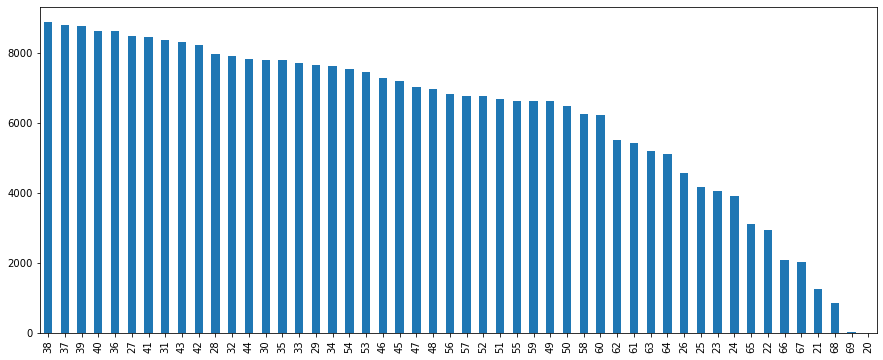

In [32]:
# Lets check 'AGE' feature
plt.figure(figsize=[15,6])
appl_data_new['AGE'].value_counts().plot.bar()

<AxesSubplot:>

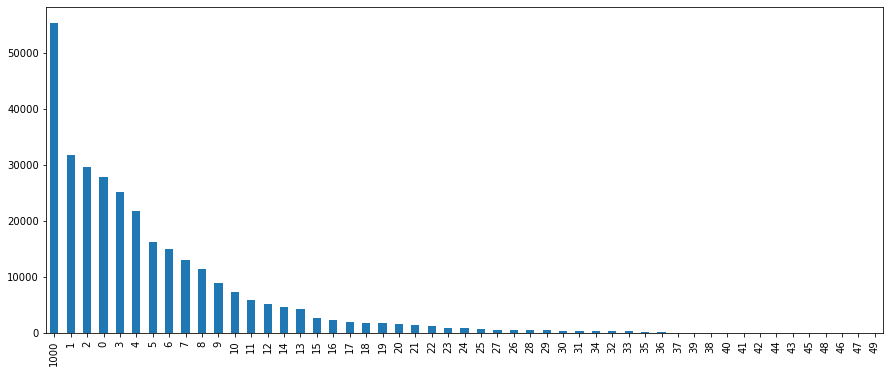

In [33]:
# Lets check 'YEARS_WORK_EXP' feature
plt.figure(figsize=[15,6])
appl_data_new['YEARS_WORK_EXP'].value_counts().plot.bar()

###### The above plot mention that maximum number of loan applicant have 1000 years of work experience, so we need to fix that  , we should replace the value 1000 with 1

In [34]:
# Lets replace 1000 with 1 in 'YEARS_WORK_EXP' feature
appl_data_new['YEARS_WORK_EXP'].replace(1000,1,inplace=True)

<AxesSubplot:>

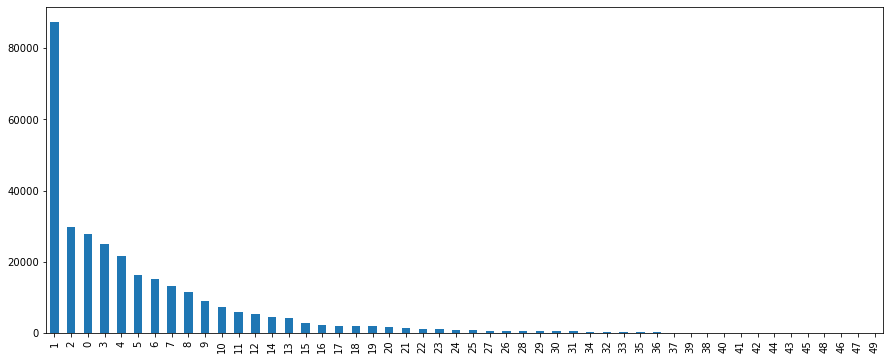

In [35]:
# Lets plot the graph to check 'YEARS_WORK_EXP' feature again
plt.figure(figsize=[15,6])
appl_data_new['YEARS_WORK_EXP'].value_counts().plot.bar()

###### Now the grpah looks fine. The maximum number of loan applicants have 1 year of work experience.

In [36]:
# Lets create a feature to store the age_groups
appl_data_new['AGE_GROUP']=pd.cut(appl_data_new['AGE'],bins=[0,10,20,30,40,50,60,70,80],labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

<AxesSubplot:>

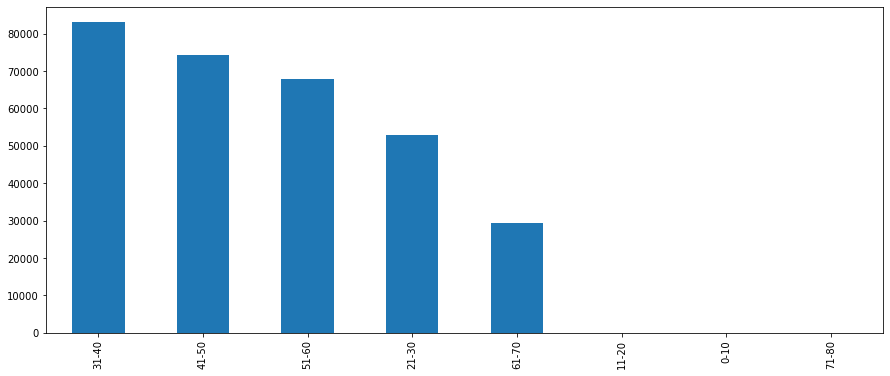

In [37]:
plt.figure(figsize=[15,6])
appl_data_new['AGE_GROUP'].value_counts().plot.bar()

###### The maximum loan applicants are from 31-40 age group 

In [38]:
# Lets take 'CNT_FAM_MEMBERS' feature
print('The missing values in CNT_FAM_MEMBERS:',appl_data_new['CNT_FAM_MEMBERS'].isnull().sum())
appl_data_new['CNT_FAM_MEMBERS'].value_counts()

The missing values in CNT_FAM_MEMBERS: 2


2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

###### In 'CNT_FAM_MEMBERS' feature only 2 family members are missing,so we could drop the missing value rows

In [39]:
appl_data_new[appl_data_new['CNT_FAM_MEMBERS'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_WORK_EXP,AGE_GROUP
41982,148605,0,Revolving loans,M,N,Y,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,12396,1161,Managers,NaN,THURSDAY,Insurance,33,3,31-40
187348,317181,0,Revolving loans,F,N,Y,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,12844,232,Accountants,NaN,FRIDAY,Business Entity Type 2,35,0,31-40


In [40]:
# Lets drop the rows
appl_data_new.drop(appl_data_new[appl_data_new['CNT_FAM_MEMBERS'].isnull()].index,axis=0,inplace=True)

In [41]:
# lets check the missing values in 'CNT_FAM_MEMBERS' again
appl_data_new['CNT_FAM_MEMBERS'].isnull().sum()

0

###### The family member numbers are in float , so we need convert their dtypes from float to int

In [42]:
appl_data_new['CNT_FAM_MEMBERS']=appl_data_new['CNT_FAM_MEMBERS'].astype(int)

In [43]:
appl_data_new['CNT_FAM_MEMBERS'].dtype

dtype('int32')

In [44]:
appl_data_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_WORK_EXP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,Laborers,1,WEDNESDAY,Business Entity Type 3,25,1,21-30
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,Core staff,2,MONDAY,School,45,3,41-50
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,Laborers,1,MONDAY,Government,52,0,51-60
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,Laborers,2,WEDNESDAY,Business Entity Type 3,52,8,51-60
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,Core staff,1,THURSDAY,Religion,54,8,51-60


In [45]:
appl_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   SK_ID_CURR                  307509 non-null  int64   
 1   TARGET                      307509 non-null  int64   
 2   NAME_CONTRACT_TYPE          307509 non-null  object  
 3   CODE_GENDER                 307509 non-null  object  
 4   FLAG_OWN_CAR                307509 non-null  object  
 5   FLAG_OWN_REALTY             307509 non-null  object  
 6   AMT_INCOME_TOTAL            307509 non-null  float64 
 7   AMT_CREDIT                  307509 non-null  float64 
 8   AMT_ANNUITY                 307497 non-null  float64 
 9   AMT_GOODS_PRICE             307233 non-null  float64 
 10  NAME_TYPE_SUITE             306219 non-null  object  
 11  NAME_INCOME_TYPE            307509 non-null  object  
 12  NAME_EDUCATION_TYPE         307509 non-null  object  
 13 

# Univariate Analysis 

#### Lets create two list which contains the features from appl_data_new with respect to their datatypes 

In [46]:
catg_cols = appl_data_new.select_dtypes(object).columns

In [47]:
num_cols = appl_data_new.select_dtypes([int,float]).columns

In [48]:
catg_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [49]:
num_cols

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'AGE', 'YEARS_WORK_EXP'],
      dtype='object')

### Univariate analysis on ordered categorical features

In [50]:
# Lets create a function to plot the countplots
def count_plot(col_name):
    plt.figure(figsize=[15,6])
    sns.countplot(appl_data_new[col_name])
    plt.xlabel(col_name)
    plt.ylabel('NUMBER OF LOAN APPLICANTS')
    plt.title('COUNT PLOT FOR: '+col_name)
    plt.show()

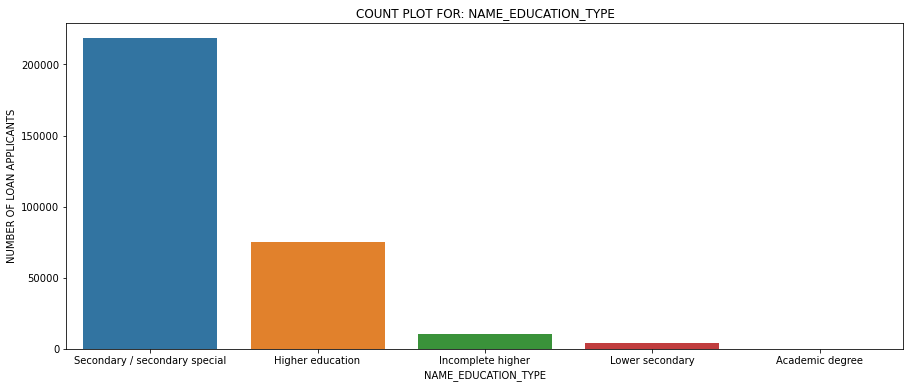

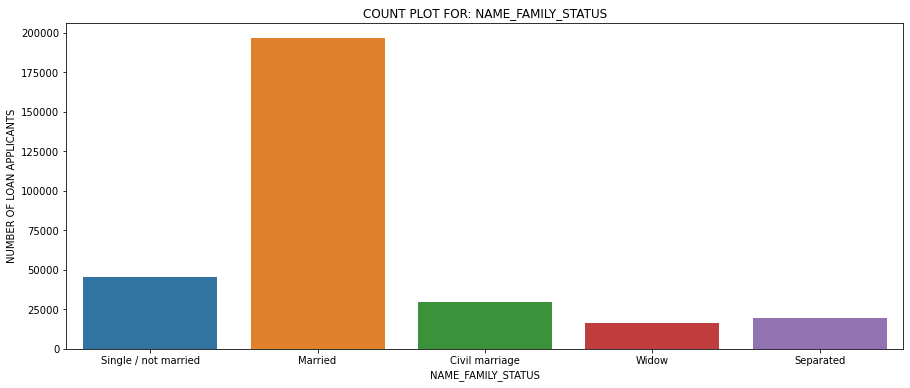

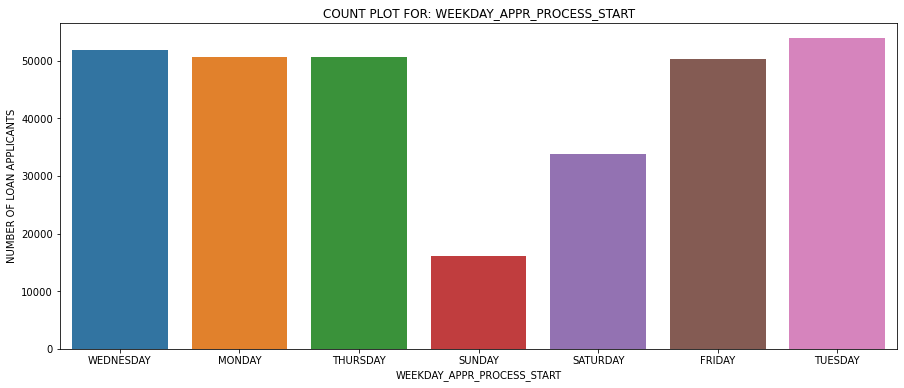

In [51]:
count_plot('NAME_EDUCATION_TYPE')
count_plot('NAME_FAMILY_STATUS')
count_plot('WEEKDAY_APPR_PROCESS_START')

###### From  'NAME_EDUCATION_TYPE' plot , we get the maximum loan applicants are from Secondary/Secondary special Educational Background.

###### From 'NAME_FAMILY_STATUS' plot, we get the maximum load applicants are married.

###### From  'WEEKDAY_APPR_PROCESS_START' plot, we get the maximum loans are applied on Tuesday.

### Univariate analysis on unordered categorical features

In [52]:
# Lets create a function for subplot
def pie_count_plot(col_name):
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    appl_data_new[col_name].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title('PIE CHART FOR: '+col_name)
    
    plt.subplot(1,2,2)
    sns.countplot(appl_data_new[col_name])
    plt.xlabel(col_name)
    plt.xticks(rotation=90)
    plt.ylabel('NUMBER OF LOAN APPLICANTS')
    plt.title('COUNT PLOT FOR: '+col_name)
    plt.tight_layout()
    plt.show()

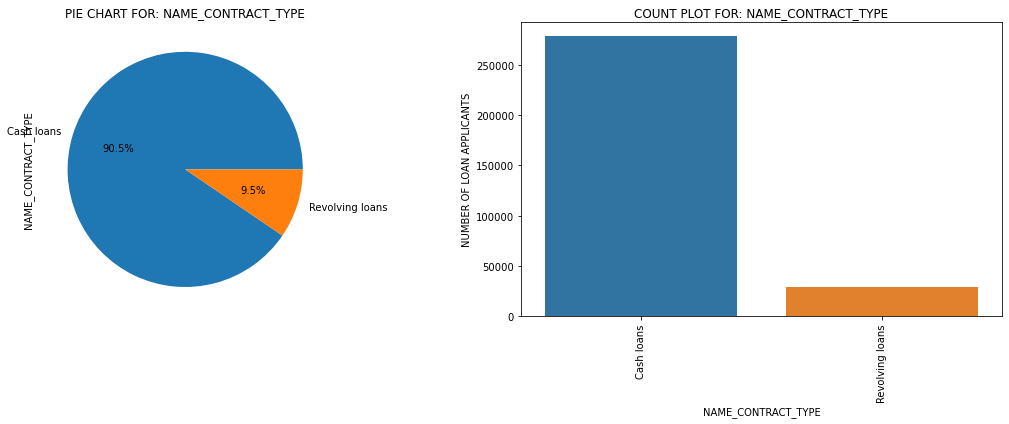

In [53]:
pie_count_plot('NAME_CONTRACT_TYPE')

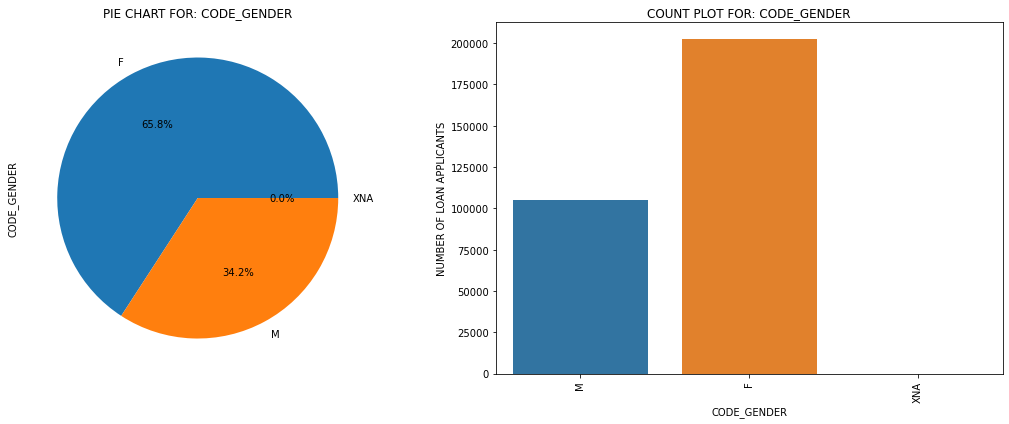

In [54]:
pie_count_plot('CODE_GENDER')

In [55]:
# Lets take 'CODE_GENDER' feature
appl_data_new['CODE_GENDER'].value_counts()

F      202447
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

###### In 'CODE_GENDER' feature we have 4 rows of 'XNA' which is not belongs to any gender, so we need to drop that rows

In [56]:
# Lets drop the rows 
appl_data_new.drop(appl_data_new[appl_data_new['CODE_GENDER']=='XNA'].index,axis=0,inplace=True)

In [57]:
appl_data_new.shape

(307505, 24)

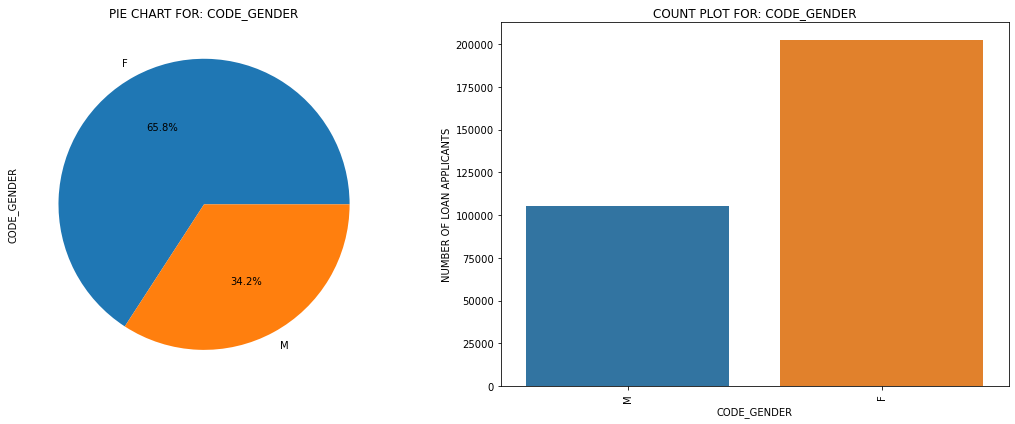

In [58]:
# Lets plot the graphs again
pie_count_plot('CODE_GENDER')

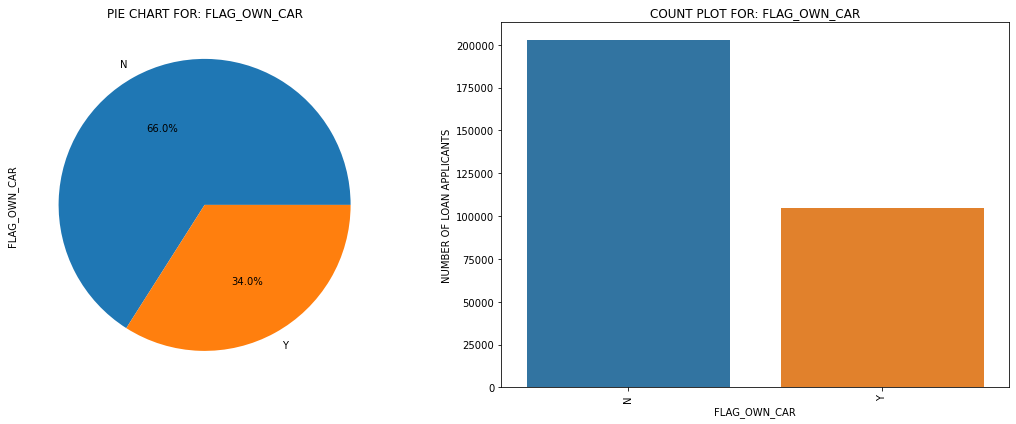

In [59]:
pie_count_plot('FLAG_OWN_CAR')

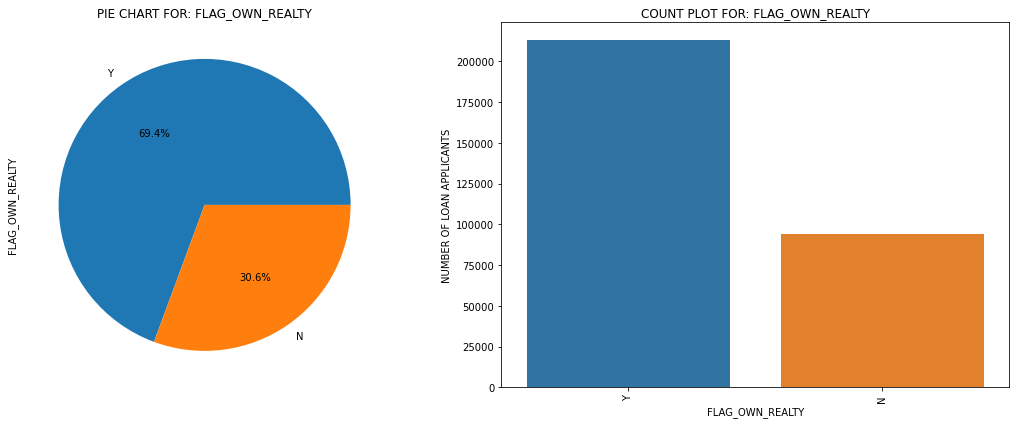

In [60]:
pie_count_plot('FLAG_OWN_REALTY')

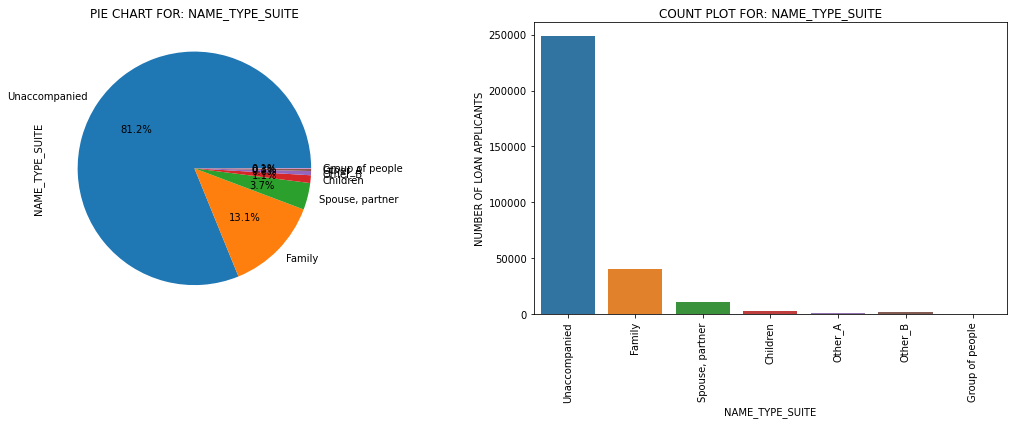

In [61]:
pie_count_plot('NAME_TYPE_SUITE')

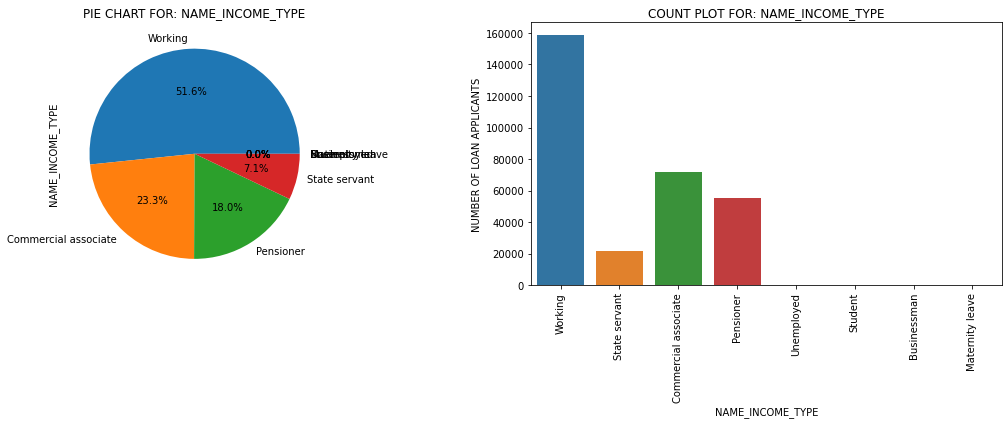

In [62]:
pie_count_plot('NAME_INCOME_TYPE')

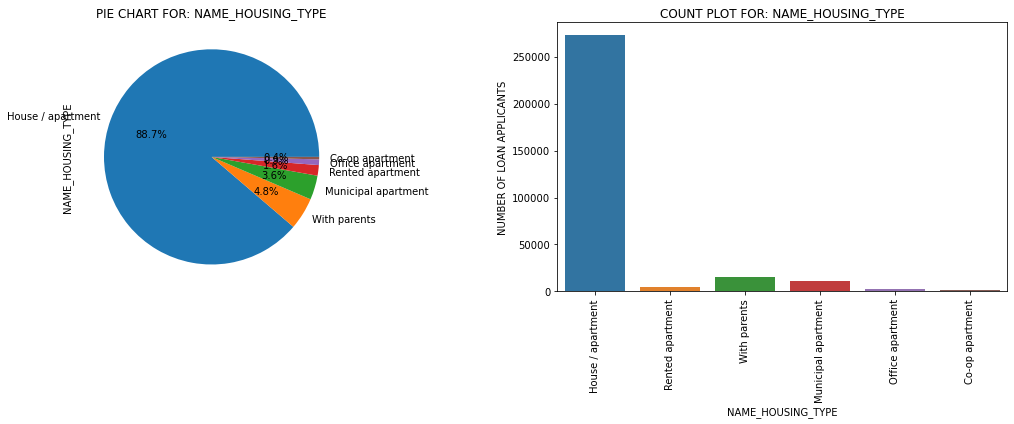

In [63]:
pie_count_plot('NAME_HOUSING_TYPE')

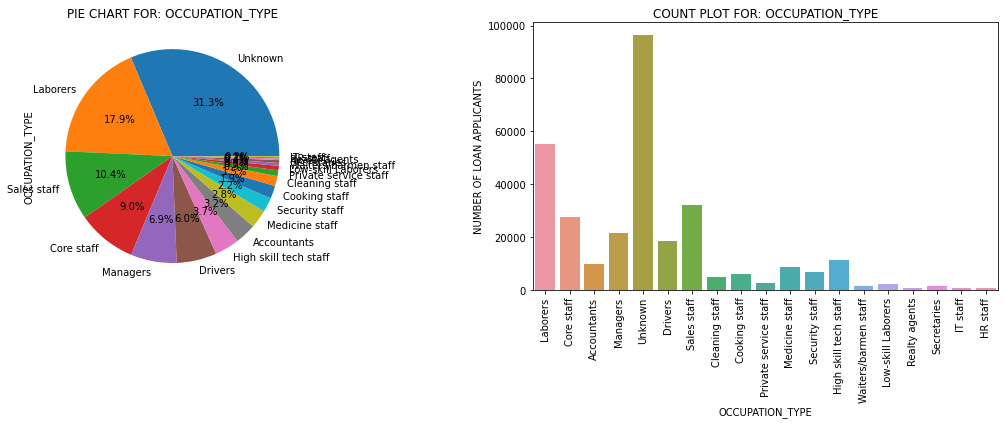

In [64]:
pie_count_plot('OCCUPATION_TYPE')

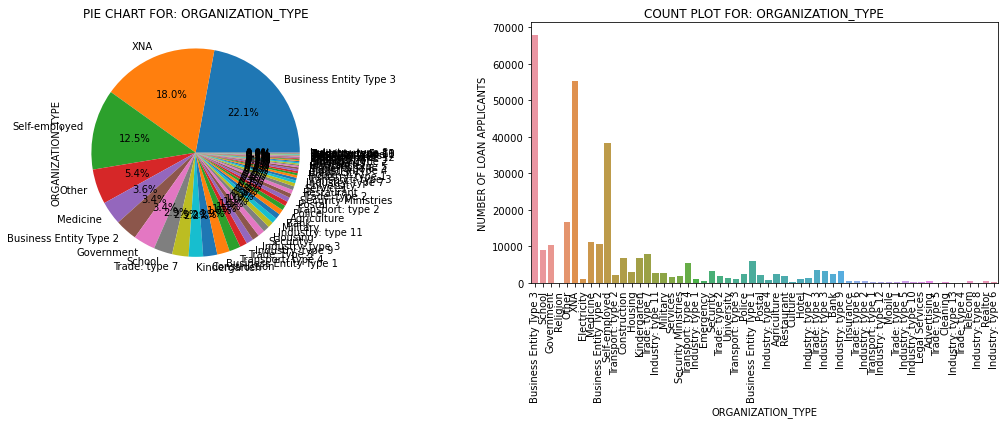

In [65]:
pie_count_plot('ORGANIZATION_TYPE')

### Univariate analysis on Numerical features

In [66]:
num_cols

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'AGE', 'YEARS_WORK_EXP'],
      dtype='object')

In [67]:
# Lets create a function for boxplot
def box_plot(col_name):
    plt.figure(figsize=[15,6])
    sns.boxplot(appl_data_new[col_name])
    plt.title('BOX PLOT FOR: '+col_name)
    plt.show()

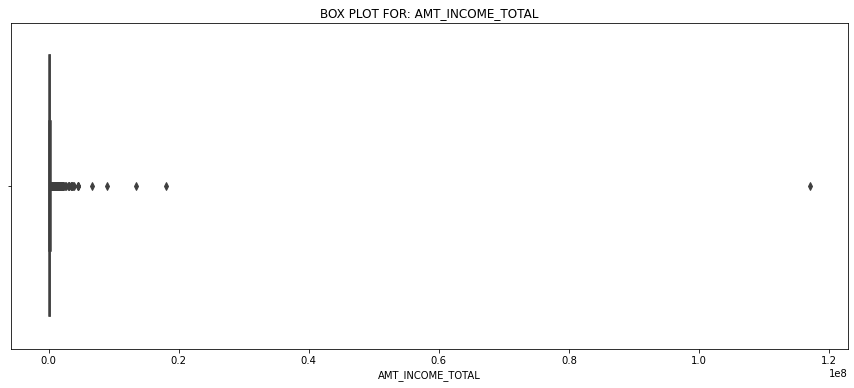

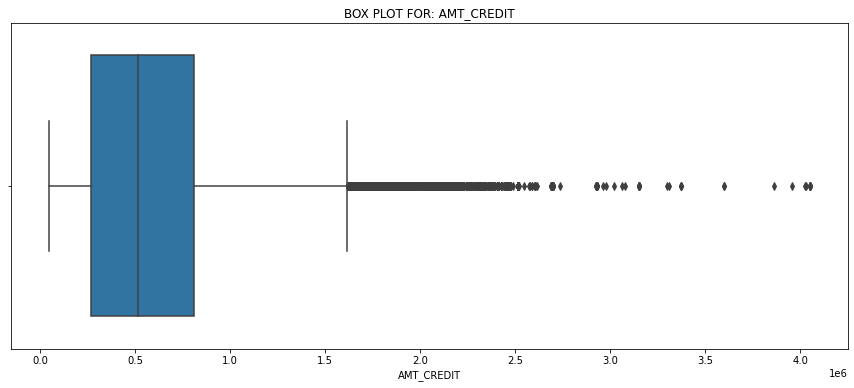

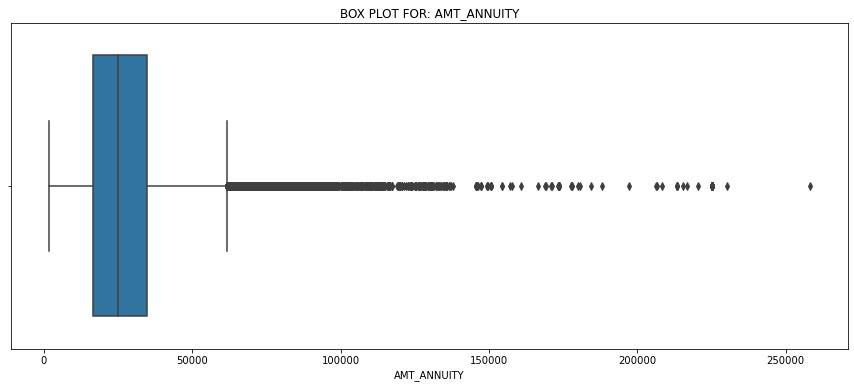

In [68]:
box_plot('AMT_INCOME_TOTAL')
box_plot('AMT_CREDIT')
box_plot('AMT_ANNUITY')

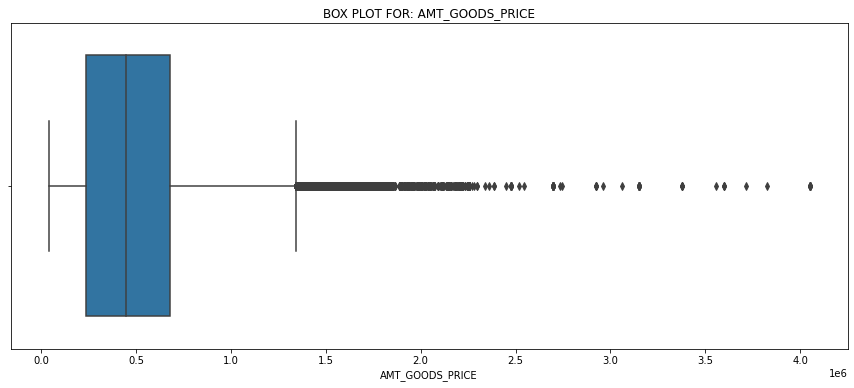

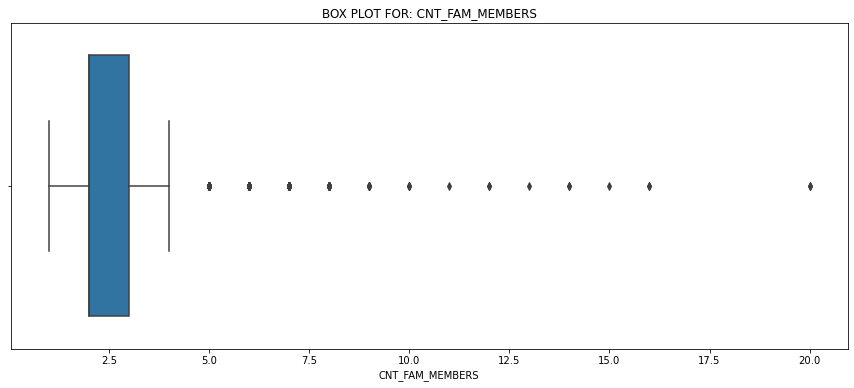

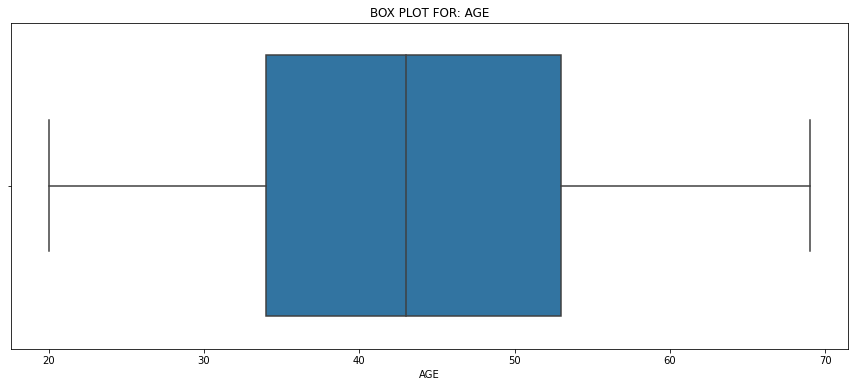

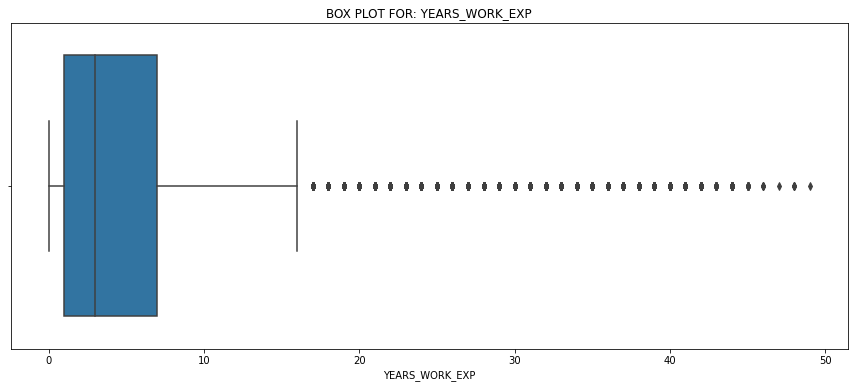

In [69]:
box_plot('AMT_GOODS_PRICE')
box_plot('CNT_FAM_MEMBERS')
box_plot('AGE')
box_plot('YEARS_WORK_EXP')

## Lets create two dataframes based on 'TARGET' feature 

In [70]:
# target0 for  Non-Defaulters & target1 for Defaulters
target0 = appl_data_new[appl_data_new['TARGET']==0]
target1 = appl_data_new[appl_data_new['TARGET']==1]

In [71]:
# Lets check target0
target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_WORK_EXP,AGE_GROUP
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,16765,1188,Core staff,2,MONDAY,School,45,3,41-50
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,Laborers,1,MONDAY,Government,52,0,51-60
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,Laborers,2,WEDNESDAY,Business Entity Type 3,52,8,51-60
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,Core staff,1,THURSDAY,Religion,54,8,51-60
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,Laborers,2,WEDNESDAY,Other,46,4,41-50


In [72]:
target0.shape

(282680, 24)

In [73]:
# Lets check target1
target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,AGE,YEARS_WORK_EXP,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,Laborers,1,WEDNESDAY,Business Entity Type 3,25,1,21-30
26,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,Cooking staff,1,MONDAY,Business Entity Type 3,51,7,51-60
40,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,Laborers,2,TUESDAY,Business Entity Type 3,47,3,41-50
42,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,Sales staff,2,THURSDAY,Self-employed,36,9,31-40
81,100096,1,Cash loans,F,N,Y,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,Unknown,2,THURSDAY,XNA,67,1,61-70


In [74]:
target1.shape

(24825, 24)

### Lets check imbalance of data based on 'TARGET' feature

<AxesSubplot:ylabel='TARGET'>

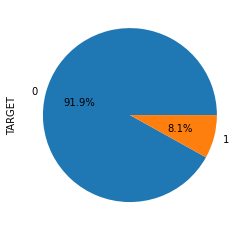

In [75]:
appl_data_new['TARGET'].value_counts().plot.pie(autopct='%1.1f%%')

###### There is no imbalance of data

## Bivariate Analysis 

In [76]:
catg_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [77]:
num_cols

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'AGE', 'YEARS_WORK_EXP'],
      dtype='object')

In [78]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT
def sub_box_plot(colx,coly,hue):
    plt.figure(figsize=[15,20])
    plt.subplot(2,1,1)
    sns.boxplot(data=target0,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=30)
    plt.ylabel(coly)
    plt.title('BOX PLOT FOR: '+colx+' vs '+coly+' [TARGET_0=NON-DEFAULTERS]')

    plt.subplot(2,1,2)
    sns.boxplot(data=target1,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=30)
    plt.ylabel(coly)
    plt.title('BOX PLOT FOR: '+colx+' vs '+coly+' [TARGET_1=DEFAULTERS]')
    plt.tight_layout()
    plt.show()

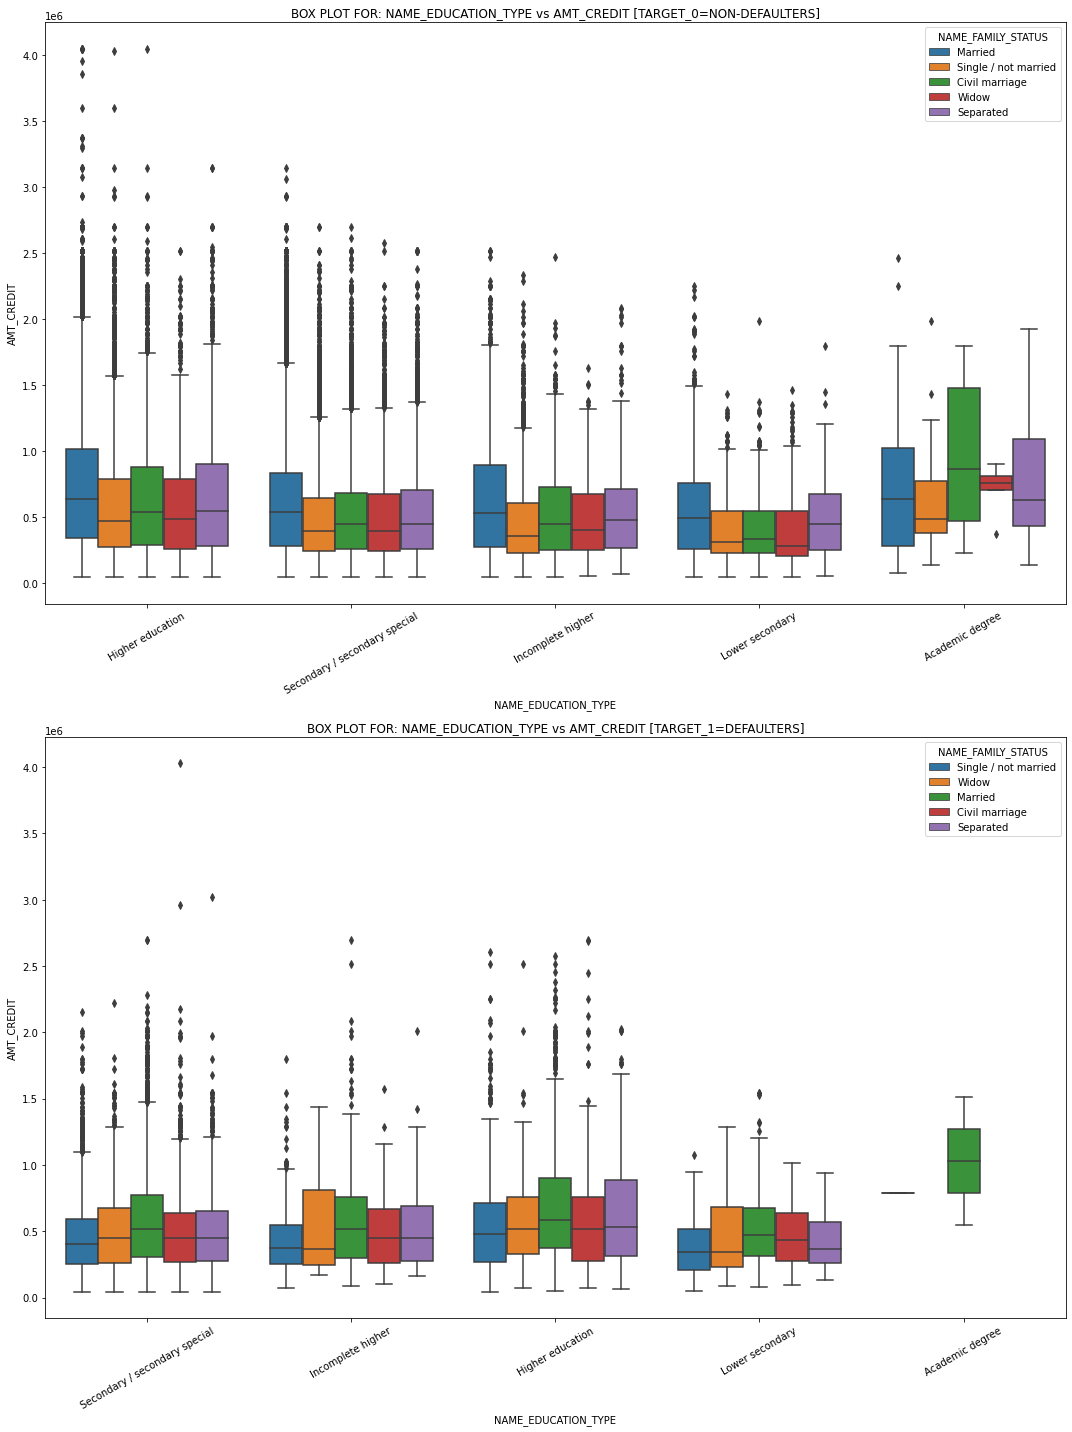

In [79]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT
sub_box_plot('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_FAMILY_STATUS')

###### The Academic degree background applicants facing less payment difficulities and Defaulted less no of loans compare to other educational background

###### The Higher and secondary educational background applicants with married status are facing more payment difficulties with higher loan amounts

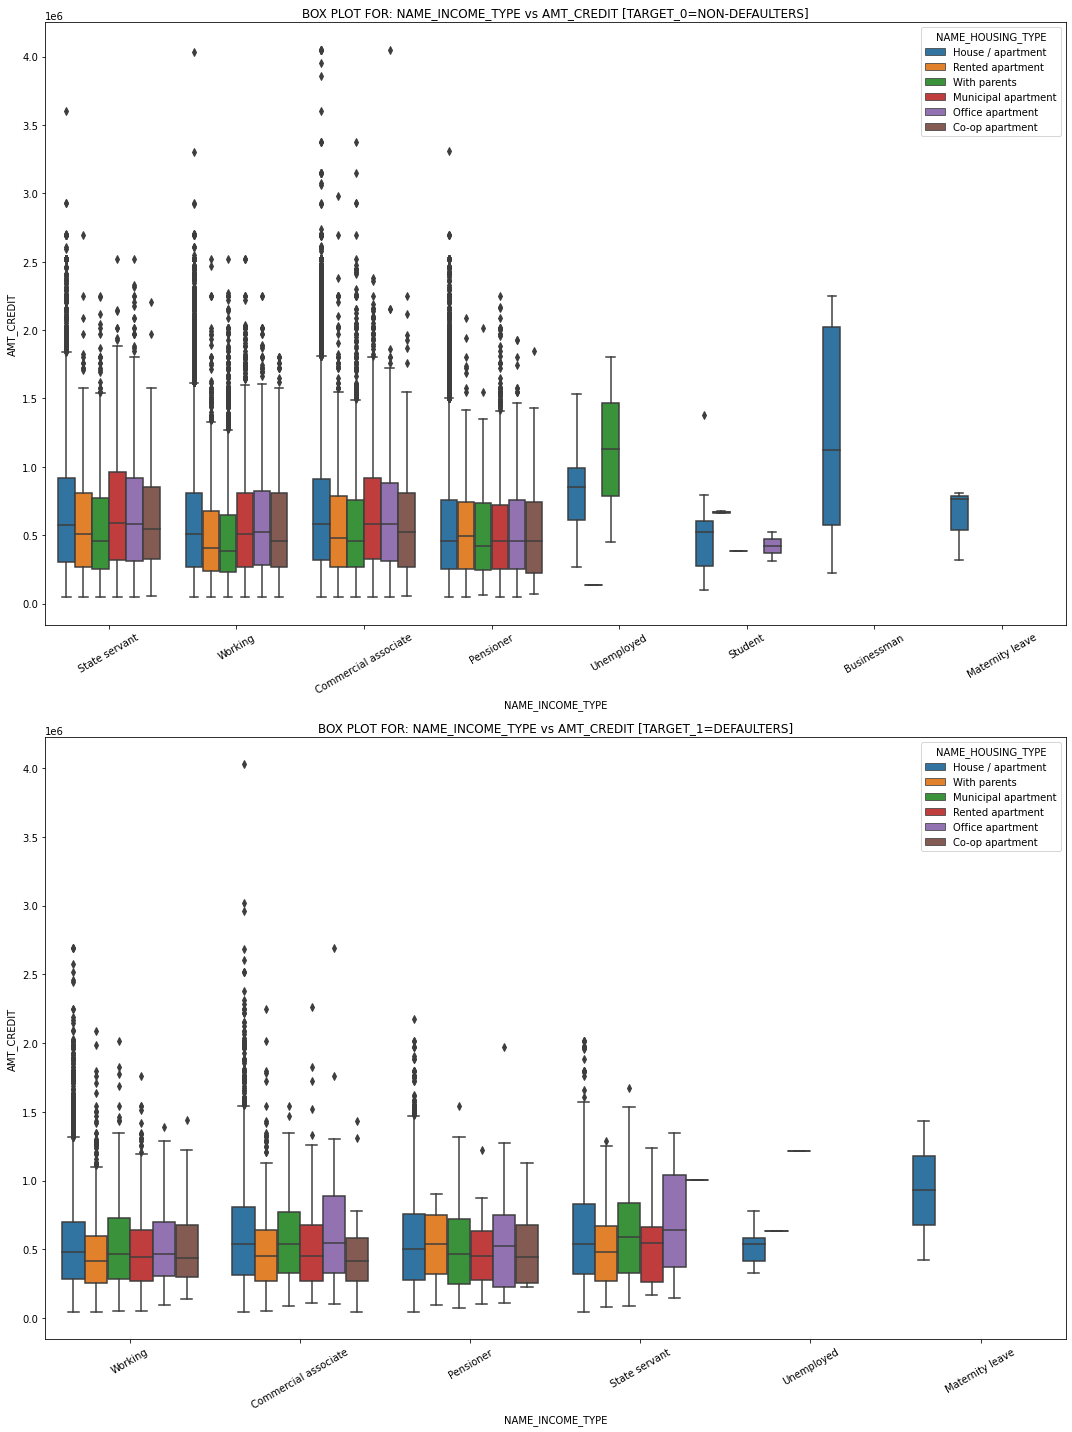

In [80]:
# NAME_INCOME_TYPE vs AMT_CREDIT based on NAME_HOUSING_TYPE
sub_box_plot('NAME_INCOME_TYPE','AMT_CREDIT','NAME_HOUSING_TYPE')

###### Businessman people are  defaulted less number of loan compared to others

###### Commercial associate and working people who lives in apparment have defaulted loans with higher loan amounts

In [81]:
# Lets create a function to plot bar charts by using subplot
def sub_bar_plot(colx,coly,hue):
    plt.figure(figsize=[20,6])
    plt.subplot(1,2,1)
    sns.barplot(data=target0,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=30)
    plt.ylabel(coly)
    plt.title('BAR PLOT FOR: '+colx+' vs '+coly+' [TARGET_0=NON-DEFAULTERS]')

    plt.subplot(1,2,2)
    sns.barplot(data=target1,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=30)
    plt.ylabel(coly)
    plt.title('BAR PLOT FOR: '+colx+' vs '+coly+' [TARGET_1=DEFAULTERS]')
    plt.tight_layout()
    plt.show()

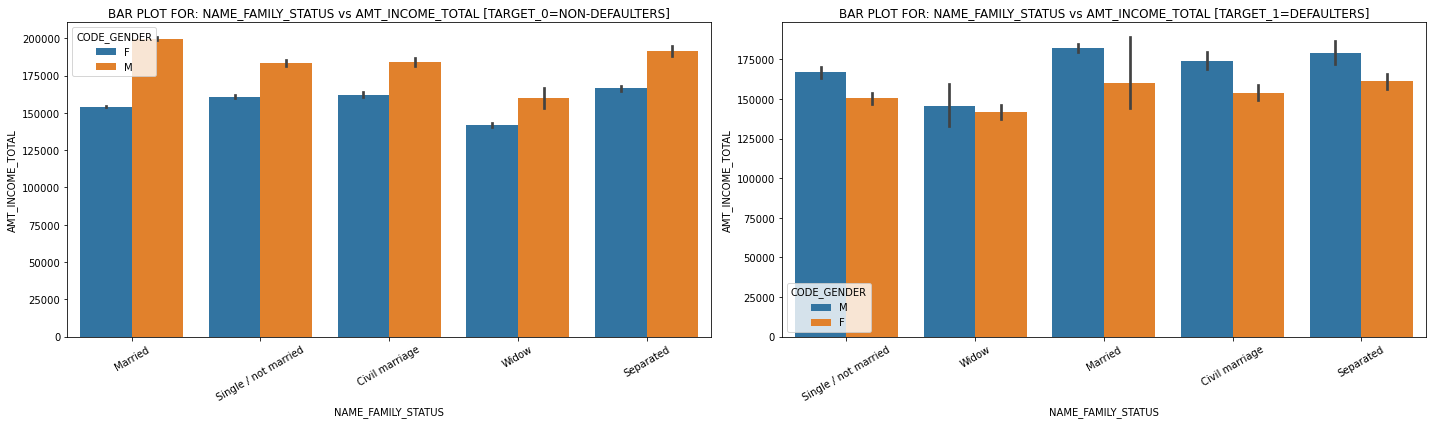

In [82]:
# NAME_FAMILY_STATUS vs AMT_INCOME_TOTAL based on CODE_GENDER
sub_bar_plot('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL','CODE_GENDER')

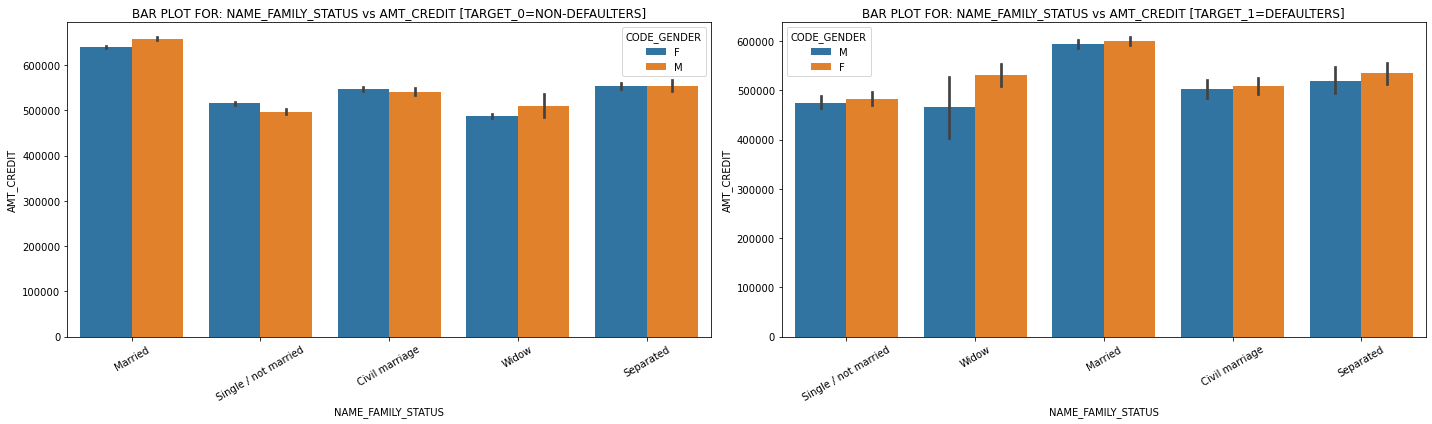

In [83]:
# NAME_FAMILY_STATUS vs AMT_CREDIT based on CODE_GENDER
sub_bar_plot('NAME_FAMILY_STATUS','AMT_CREDIT','CODE_GENDER')

###### Number of Defaulters are higher in females compare to male 

## Segmented Univariate analysis 

In [84]:
catg_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [85]:
num_cols

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS',
       'AGE', 'YEARS_WORK_EXP'],
      dtype='object')

In [86]:
# Lets create function for subplot for pie chart
def sub_pie_plot(col_name):
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    target0[col_name].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title('PIE CHART FOR: '+col_name+' [TARGET_0=NON-DEFAULTERS]')
    
    plt.subplot(1,2,2)
    target1[col_name].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title('PIE CHART FOR: '+col_name+' [TARGET_1=DEFAULTERS]')

    plt.show()

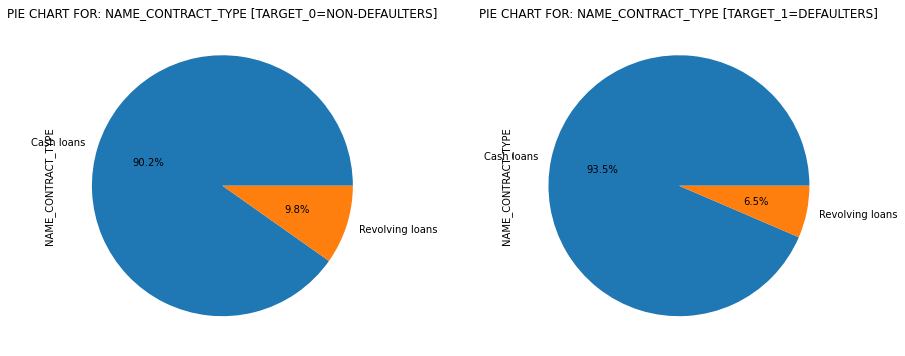

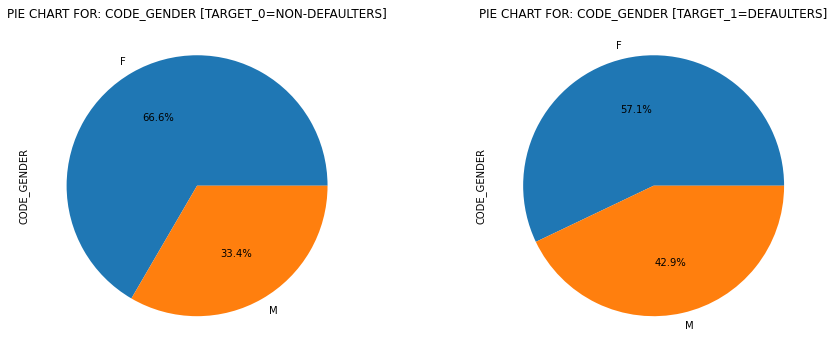

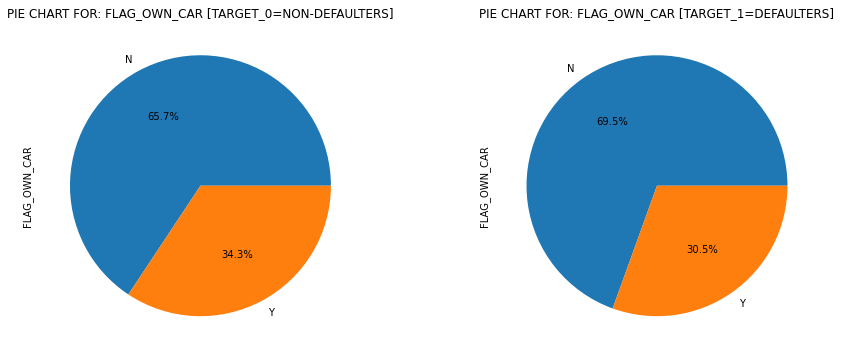

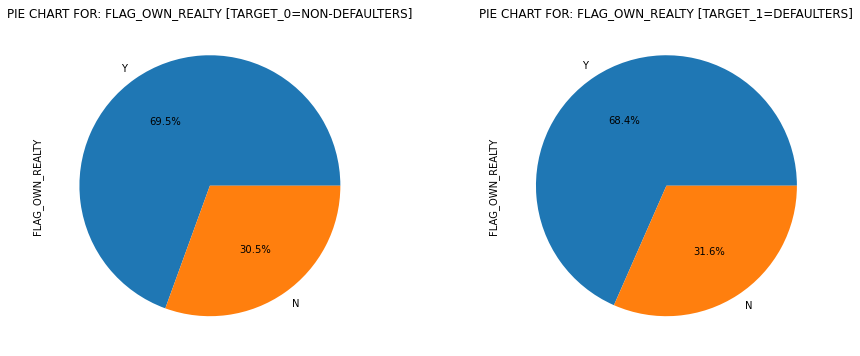

In [87]:
sub_pie_plot('NAME_CONTRACT_TYPE')
sub_pie_plot('CODE_GENDER')
sub_pie_plot('FLAG_OWN_CAR')
sub_pie_plot('FLAG_OWN_REALTY')

######  Cash loans contract type defaulted loans higher than revolving contract type

######  Females defaulted loans higher than males

######  Clients have own car defaulted loans higher than clients don't have car

######  Clients have own house or flat defaulted loans higher than clients don't have house or flat

In [88]:
# Lets create a function to plot countplots by using subplot
def sub_count_plot(col_name):
    plt.figure(figsize=[20,8])
    plt.subplot(1,2,1)
    sns.countplot(target0[col_name])
    plt.xlabel(col_name)
    plt.xticks(rotation=90)
    plt.ylabel('NUMBER OF LOAN APPLICANTS')
    plt.title('COUNTPLOT FOR: '+col_name+' [TARGET_0=NON-DEFAULTERS]')

    plt.subplot(1,2,2)
    sns.countplot(target1[col_name])
    plt.xlabel(col_name)
    plt.xticks(rotation=90)
    plt.ylabel('NUMBER OF LOAN APPLICANTS')
    plt.title('COUNTPLOT FOR: '+col_name+' [TARGET_1=DEFAULTERS]')
    plt.show()

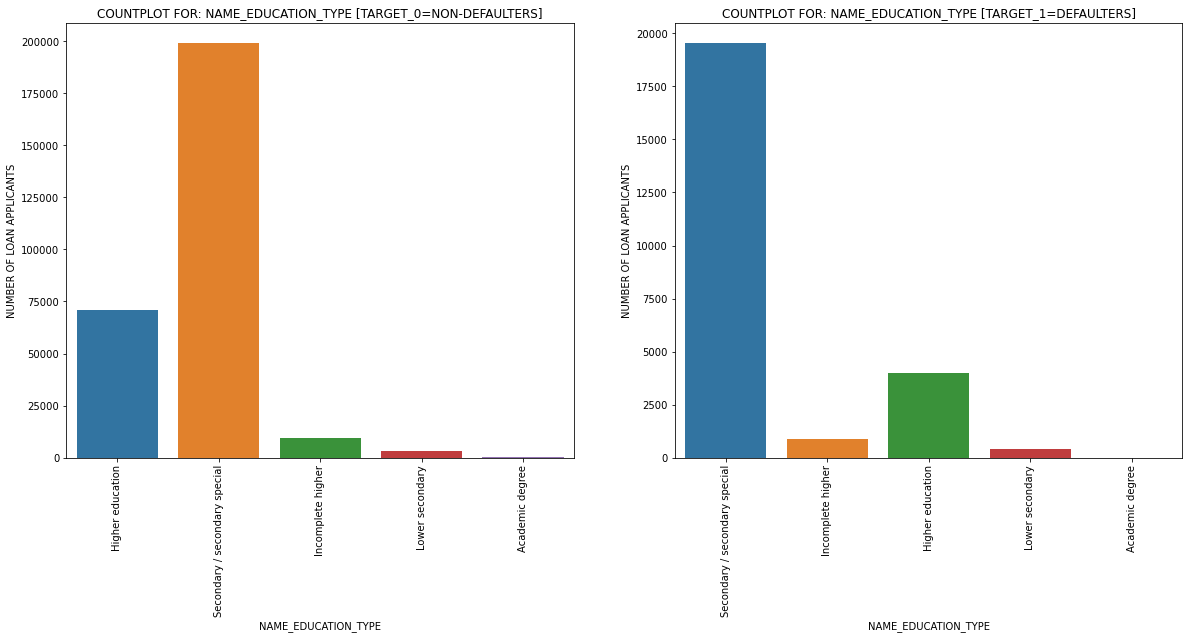

In [89]:
sub_count_plot('NAME_EDUCATION_TYPE')

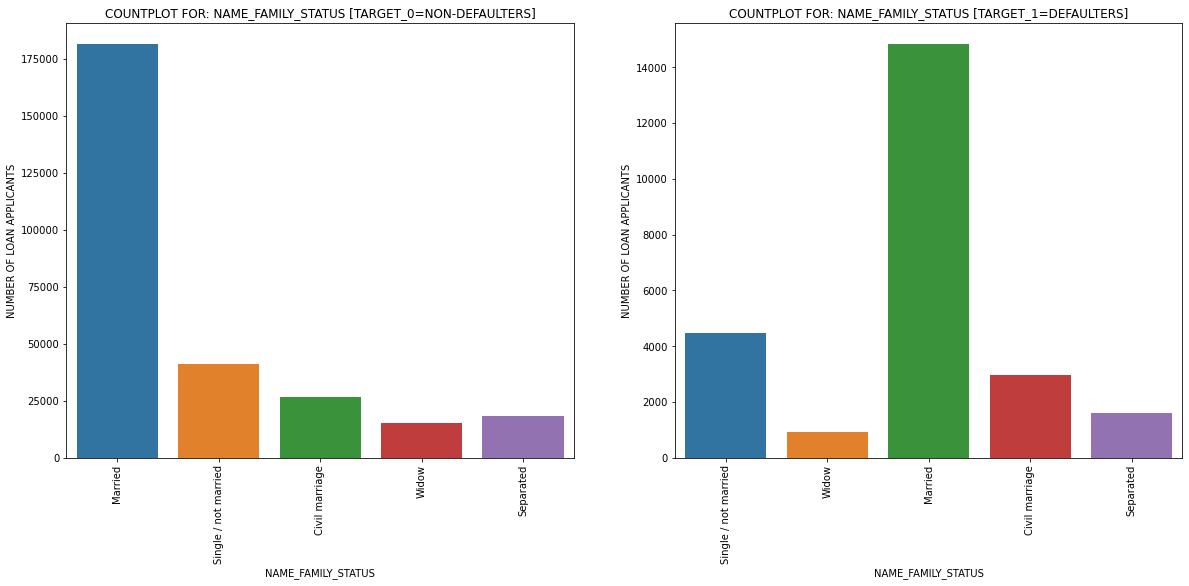

In [90]:
sub_count_plot('NAME_FAMILY_STATUS')

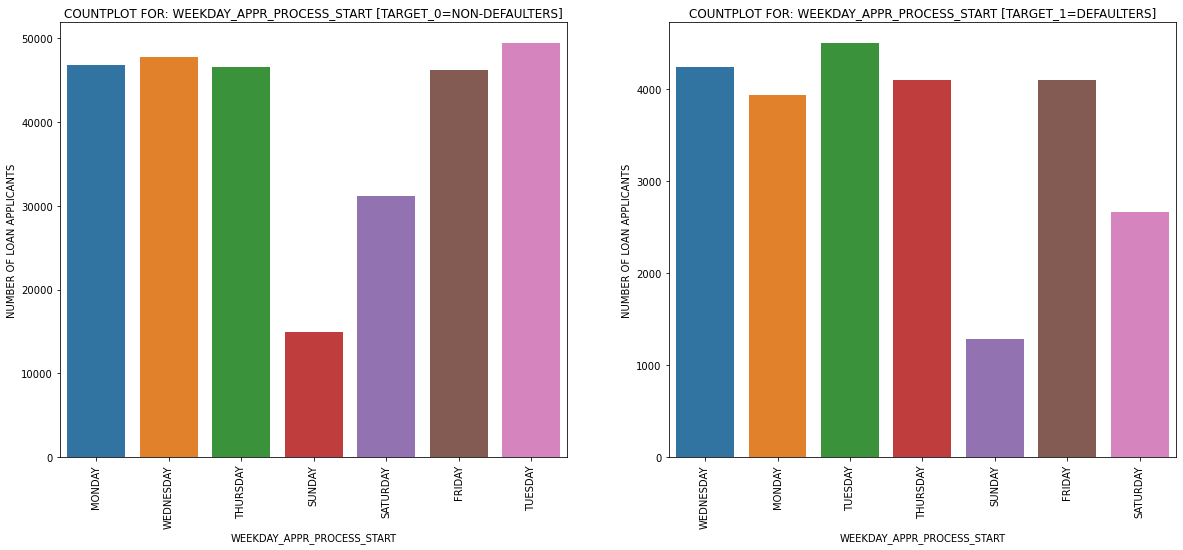

In [91]:
sub_count_plot('WEEKDAY_APPR_PROCESS_START')

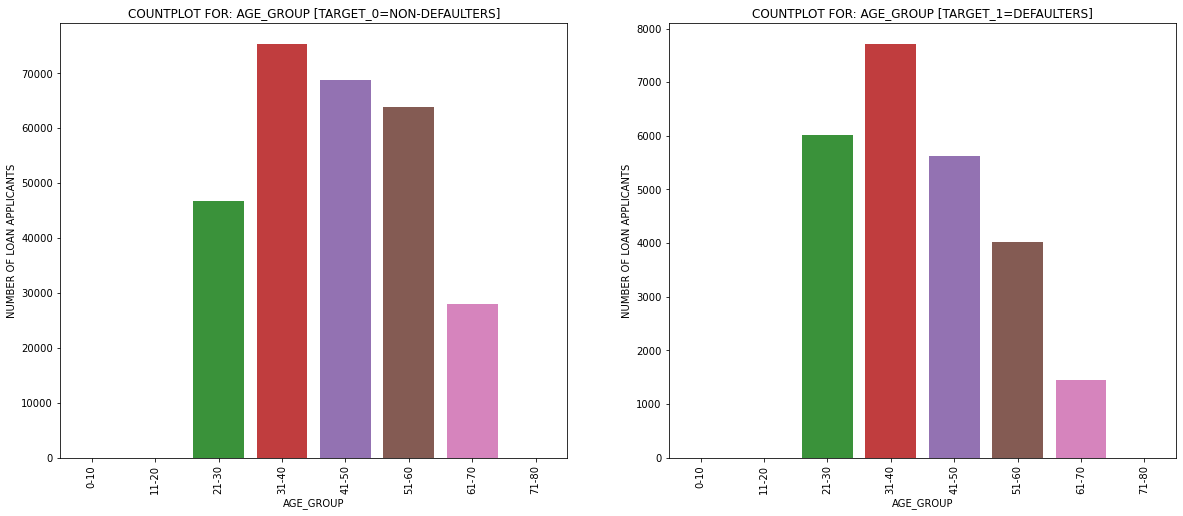

In [92]:
sub_count_plot('AGE_GROUP')

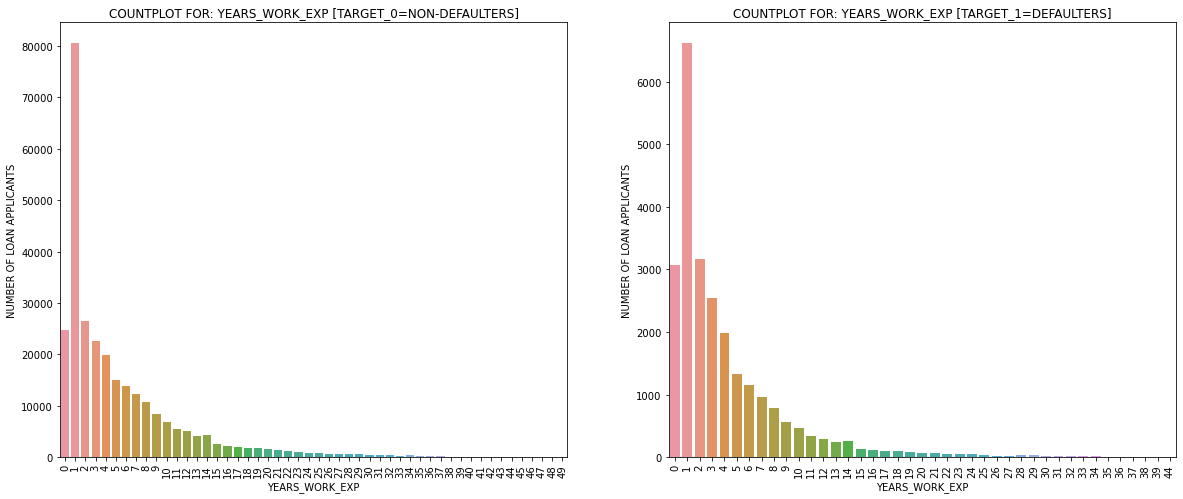

In [93]:
sub_count_plot('YEARS_WORK_EXP')

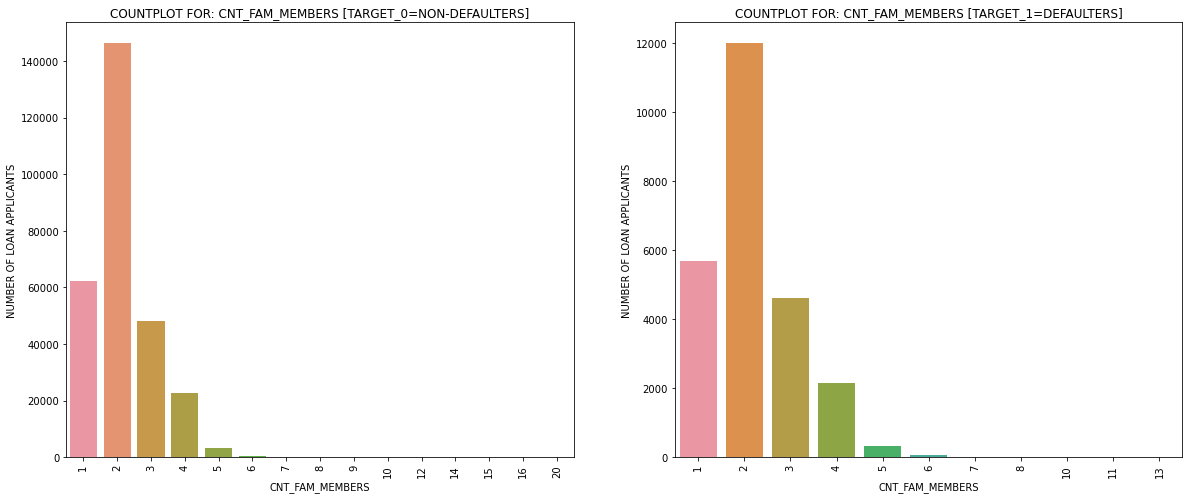

In [94]:
sub_count_plot('CNT_FAM_MEMBERS')

## Multivariate Analysis 

### Lets find out correlation between features

In [95]:
appl_data_new.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AGE,YEARS_WORK_EXP
count,307505.000000,307505.000000,3.075050e+05,3.075050e+05,307493.000000,3.072290e+05,307505.000000,307505.000000,307505.000000,307505.000000,307505.000000
mean,278181.821811,0.080730,1.687967e+05,5.990284e+05,27108.638224,5.383977e+05,16037.049495,67726.005847,2.152658,43.436116,5.129936
std,102790.177600,0.272421,2.371248e+05,4.024939e+05,14493.840051,3.694472e+05,4363.987877,139444.817987,0.910680,11.954592,6.123582
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,7489.000000,0.000000,1.000000,20.000000,0.000000
25%,189147.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,12413.000000,933.000000,2.000000,34.000000,1.000000
50%,278203.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,15750.000000,2219.000000,2.000000,43.000000,3.000000
75%,367144.000000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,19682.000000,5707.000000,3.000000,53.000000,7.000000
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,25229.000000,365243.000000,20.000000,69.000000,49.000000


In [96]:
corr_target0 = target0[['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_BIRTH','DAYS_EMPLOYED']].corr()

In [97]:
corr_target0

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED
SK_ID_CURR,1.000000,0.001749,-0.000349,0.000062,-0.000215,-0.002778,0.001344,0.001738
AMT_INCOME_TOTAL,0.001749,1.000000,0.342803,0.418955,0.349461,0.034259,-0.062601,-0.140389
AMT_CREDIT,-0.000349,0.342803,1.000000,0.771308,0.987253,0.064544,0.047376,-0.070108
AMT_ANNUITY,0.000062,0.418955,0.771308,1.000000,0.776686,0.075796,-0.012263,-0.104981
AMT_GOODS_PRICE,-0.000215,0.349461,0.987253,0.776686,1.000000,0.062824,0.044567,-0.068612
CNT_FAM_MEMBERS,-0.002778,0.034259,0.064544,0.075796,0.062824,1.000000,-0.285822,-0.238299
DAYS_BIRTH,0.001344,-0.062601,0.047376,-0.012263,0.044567,-0.285822,1.000000,0.626115
DAYS_EMPLOYED,0.001738,-0.140389,-0.070108,-0.104981,-0.068612,-0.238299,0.626115,1.000000


In [98]:
corr_target1 = target1[['SK_ID_CURR','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS','DAYS_BIRTH','DAYS_EMPLOYED']].corr()

In [99]:
corr_target1

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,DAYS_BIRTH,DAYS_EMPLOYED
SK_ID_CURR,1.000000,-0.010165,-0.001290,-0.007578,-0.001816,-0.003816,0.001254,-0.005161
AMT_INCOME_TOTAL,-0.010165,1.000000,0.038131,0.046421,0.037583,0.006654,-0.003096,-0.014977
AMT_CREDIT,-0.001290,0.038131,1.000000,0.752195,0.983103,0.051224,0.135316,0.001930
AMT_ANNUITY,-0.007578,0.046421,0.752195,1.000000,0.752699,0.075711,0.014303,-0.081207
AMT_GOODS_PRICE,-0.001816,0.037583,0.983103,0.752699,1.000000,0.047388,0.135810,0.006642
CNT_FAM_MEMBERS,-0.003816,0.006654,0.051224,0.075711,0.047388,1.000000,-0.203267,-0.186515
DAYS_BIRTH,0.001254,-0.003096,0.135316,0.014303,0.135810,-0.203267,1.000000,0.582185
DAYS_EMPLOYED,-0.005161,-0.014977,0.001930,-0.081207,0.006642,-0.186515,0.582185,1.000000


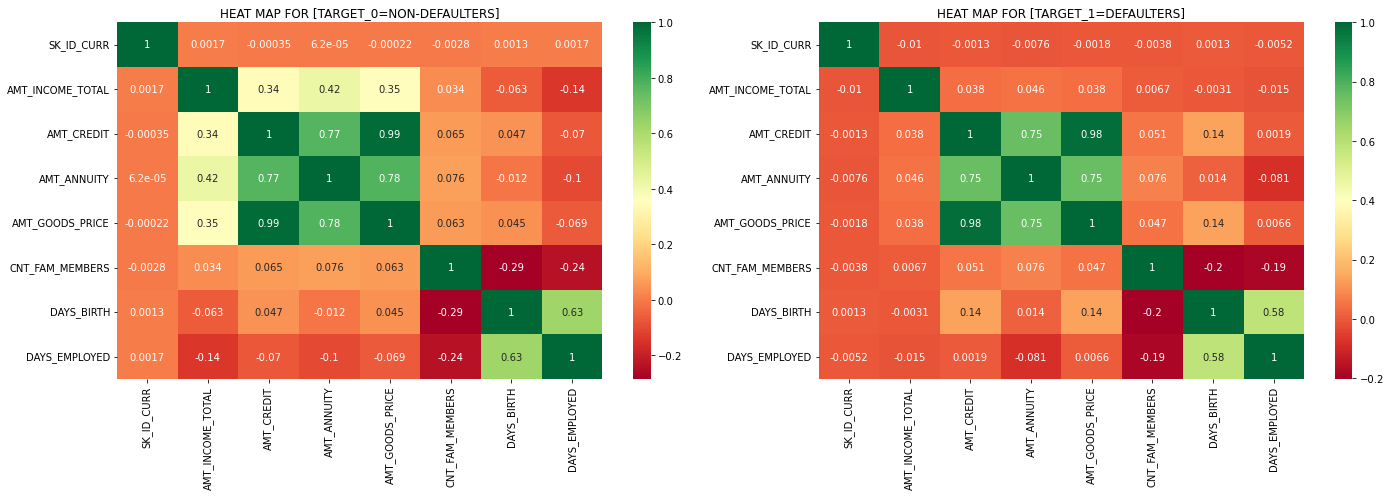

In [100]:
# Lets create function for heatmap
plt.figure(figsize=[20,7])
plt.subplot(1,2,1)
sns.heatmap(corr_target0,cmap='RdYlGn',annot=True)
plt.title('HEAT MAP FOR [TARGET_0=NON-DEFAULTERS]')
         
plt.subplot(1,2,2)
sns.heatmap(corr_target1,cmap='RdYlGn',annot=True)
plt.title('HEAT MAP FOR [TARGET_1=DEFAULTERS]')

plt.tight_layout()
plt.show()

###### From the above heat map , There is a strong correlation between credit amount of the loan and the price of the goods for which the loan is given.

###### From the above heat map , There is a strong correlation between Client's age and clients employment.

In [101]:
# Lets plot a scatter plot between AMT_GOODS_PRICE vs AMT_CREDIT
def sub_scatter_plot(colx,coly):
    plt.figure(figsize=[15,6])
    plt.subplot(1,2,1)
    sns.scatterplot(data=target0,x=colx,y=coly)
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title(colx+' vs '+coly+' [TARGET_0=NON-DEFAULTERS]\n')

    plt.subplot(1,2,2)
    sns.scatterplot(data=target1,x=colx,y=coly)
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title(colx+' vs '+coly+' [TARGET_1=DEFAULTERS]\n')
    plt.tight_layout()
    plt.show()

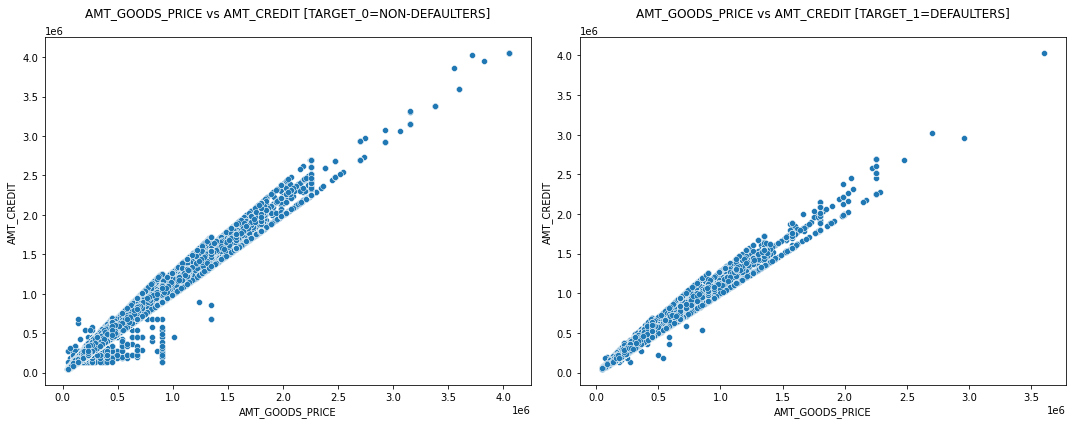

In [102]:
sub_scatter_plot('AMT_GOODS_PRICE','AMT_CREDIT')

# previous_application data 

In [103]:
# Lets load the previous_application data
prev_appl_data = pd.read_csv('previous_application.csv')

### Sanity check 

In [104]:
# Lets print first five rows
prev_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# shape of prev_appl_data
prev_appl_data.shape

(1670214, 37)

###### prev_appl_data have rows=1670214 & columns=37

In [106]:
# info of prev_appl_data
prev_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing values in prev_appl_data 

In [107]:
# Lets calculate the percentage of missing values in prev_appl_data
100*(prev_appl_data.isnull().mean()).sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [108]:
# Drop the features with missing values more than 40% in prev_appl_data
drop_prev_col = prev_appl_data.columns[(100*(prev_appl_data.isnull().mean()))>40]
prev_appl_data.drop(drop_prev_col,axis=1,inplace=True)

In [109]:
# Check the percentage of missing values in prev_appl_data again
100*(prev_appl_data.isnull().mean()).sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [110]:
# shape of prev_appl_data again
prev_appl_data.shape

(1670214, 26)

In [111]:
prev_appl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [112]:
prev_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


## Univariate analysis - prev_appl_data

#### Lets create two list which contains the features from prev_appl_data with respect to their datatypes 

In [113]:
prev_catg_cols = prev_appl_data.select_dtypes(object).columns
prev_num_cols = prev_appl_data.select_dtypes([int,float]).columns

In [114]:
prev_catg_cols

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [115]:
prev_num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

### Univariate analysis on ordered categorical features

In [116]:
# Lets create a function to plot the countplots
def prev_count_plot(col_name):
        plt.figure(figsize=[10,6])
        sns.countplot(prev_appl_data[col_name])
        plt.xlabel(col_name)
        plt.xticks(rotation=90)
        plt.ylabel('NUMBER OF LOAN APPLICANTS')
        plt.title('COUNT PLOT FOR: '+col_name)
        plt.tight_layout()
        plt.show()

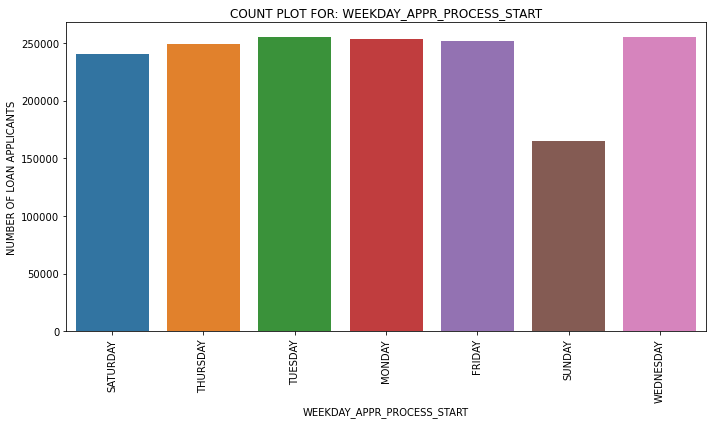

In [117]:
prev_count_plot('WEEKDAY_APPR_PROCESS_START')

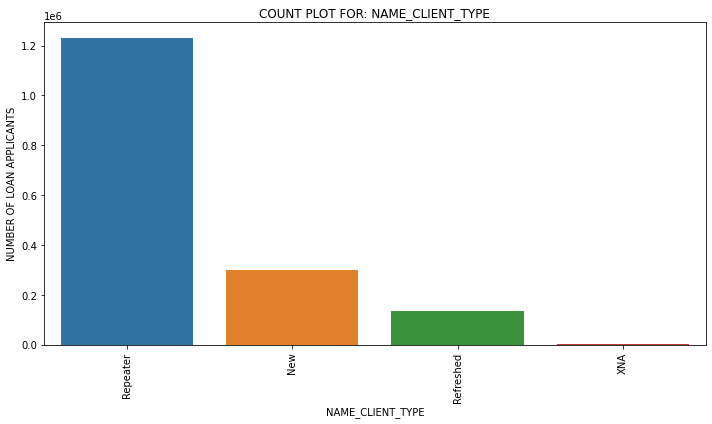

In [118]:
prev_count_plot('NAME_CLIENT_TYPE')

### Univariate analysis on Unordered categorical features

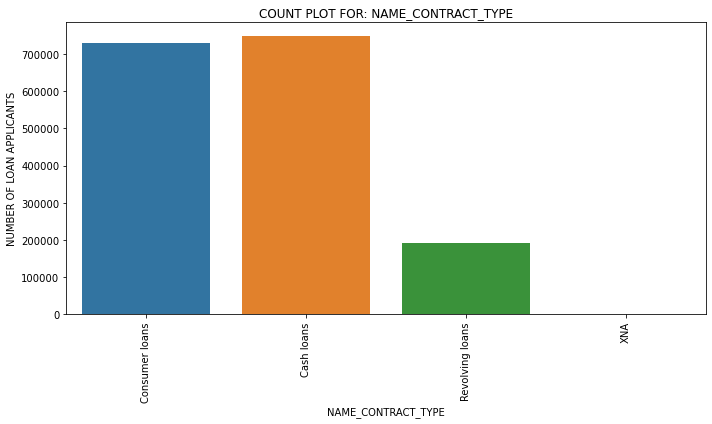

In [119]:
prev_count_plot('NAME_CONTRACT_TYPE')

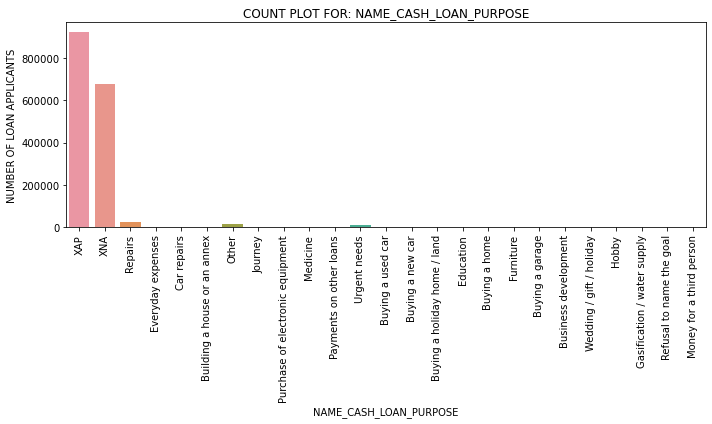

In [120]:
prev_count_plot('NAME_CASH_LOAN_PURPOSE')

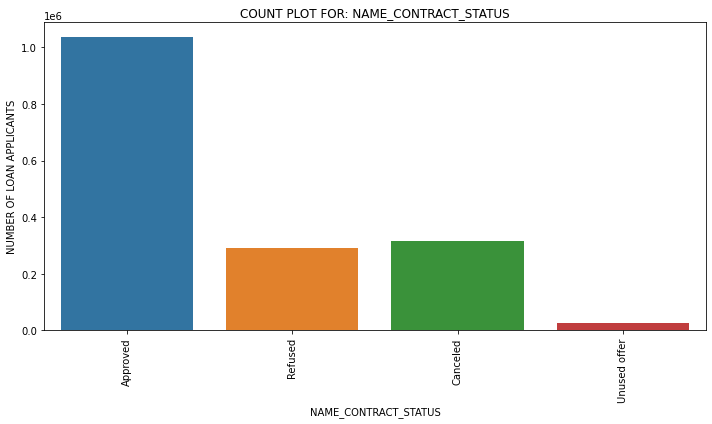

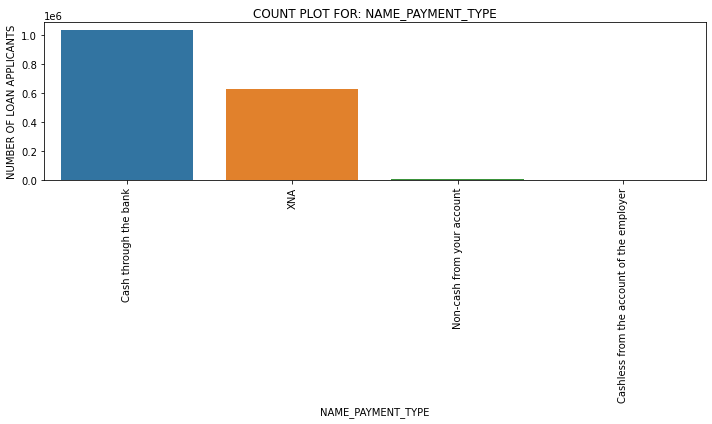

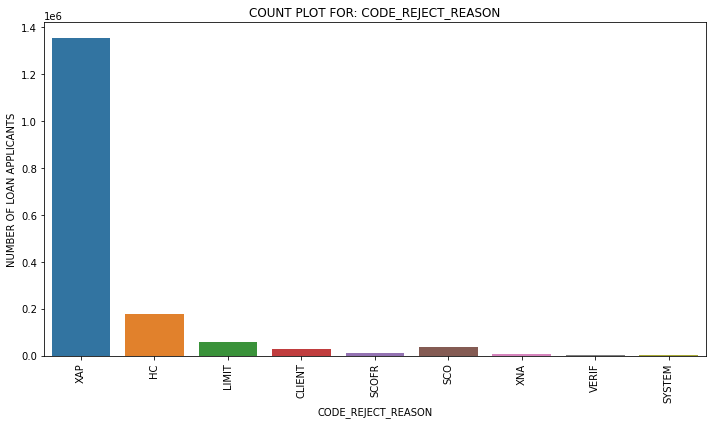

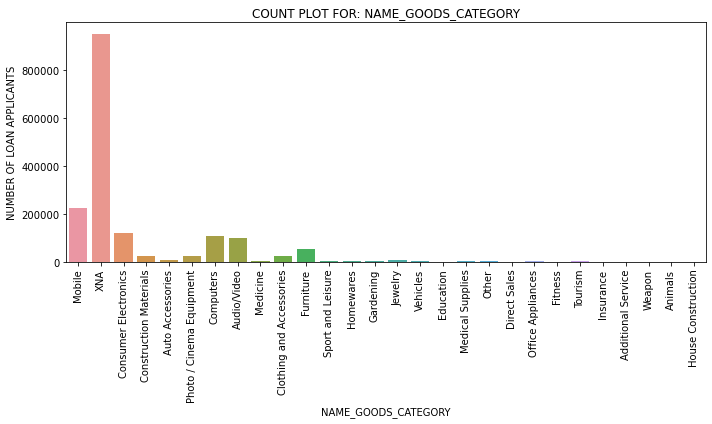

In [121]:
prev_count_plot('NAME_CONTRACT_STATUS')
prev_count_plot('NAME_PAYMENT_TYPE')
prev_count_plot('CODE_REJECT_REASON')
prev_count_plot('NAME_GOODS_CATEGORY')

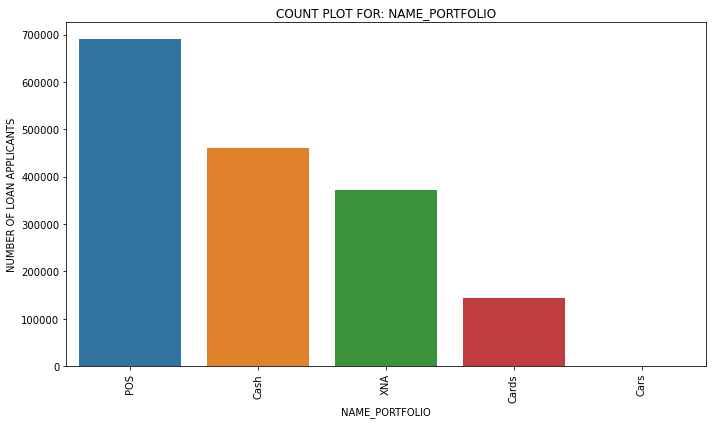

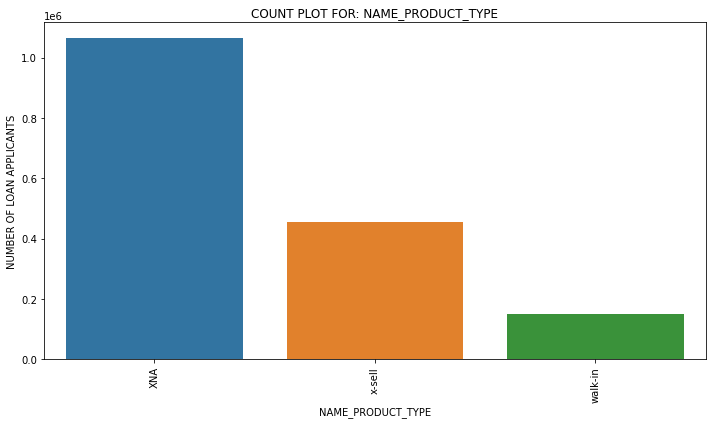

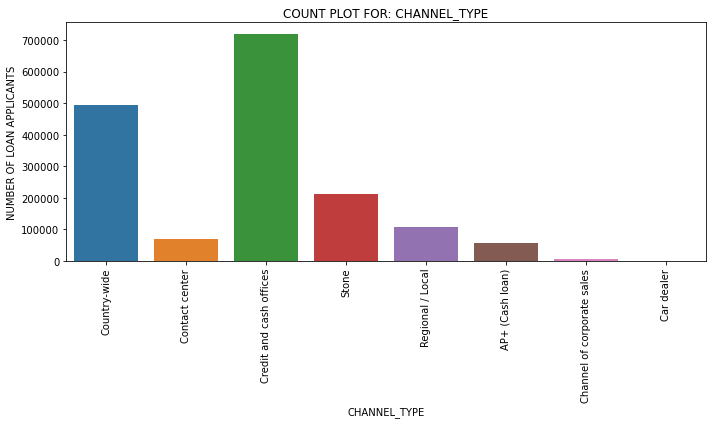

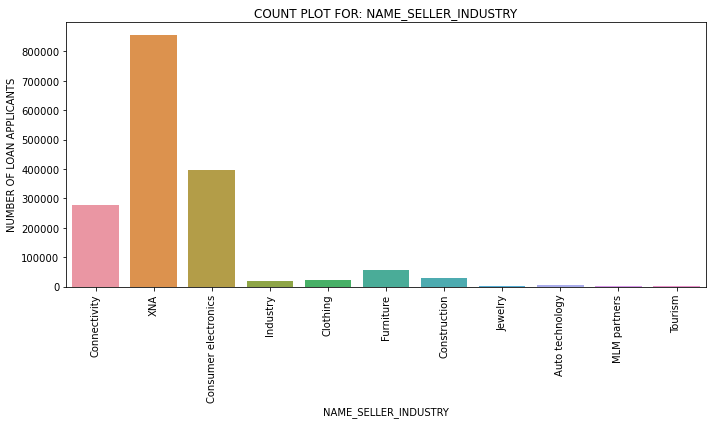

In [122]:
prev_count_plot('NAME_PORTFOLIO')
prev_count_plot('NAME_PRODUCT_TYPE')
prev_count_plot('CHANNEL_TYPE')
prev_count_plot('NAME_SELLER_INDUSTRY')

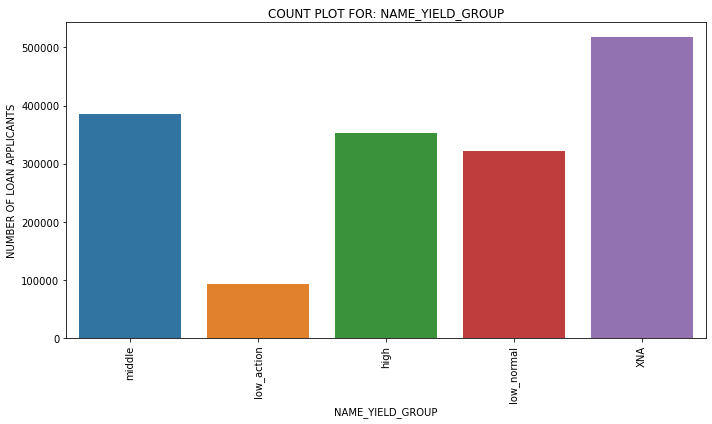

In [123]:
prev_count_plot('NAME_YIELD_GROUP')

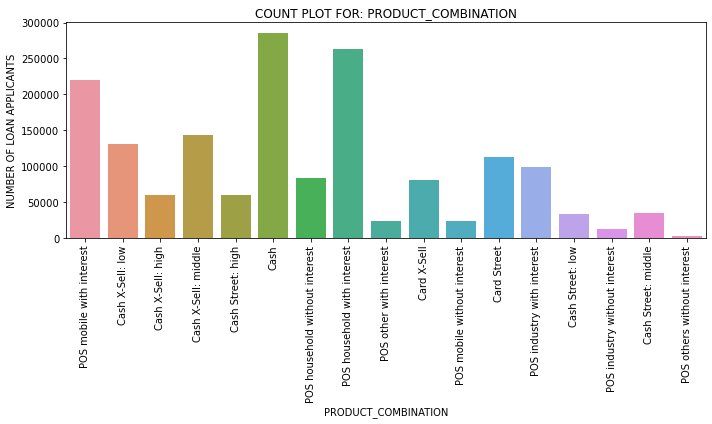

In [124]:
prev_count_plot('PRODUCT_COMBINATION')

### Univariate analysis on Numerical features 

In [125]:
prev_num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [130]:
prev_appl_data[prev_num_cols].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [127]:
# Lets create a function for boxplot
def prev_box_plot(col_name):
    plt.figure(figsize=[8,4])
    sns.boxplot(prev_appl_data[col_name])
    plt.title('BOX PLOT FOR: '+col_name)
    plt.show()

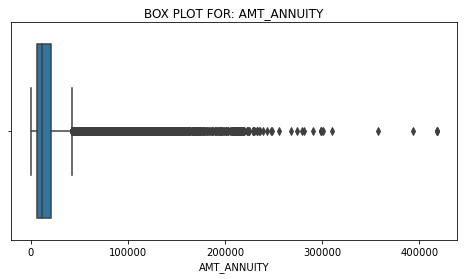

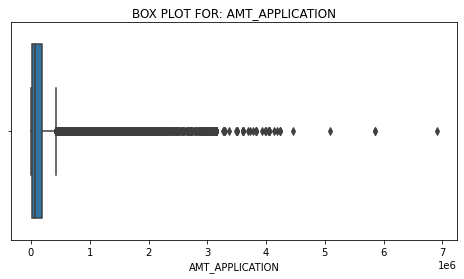

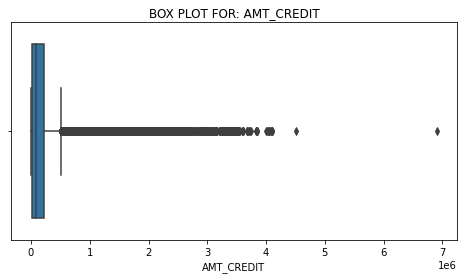

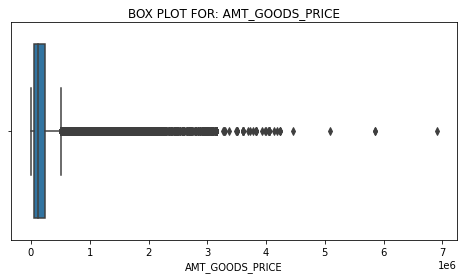

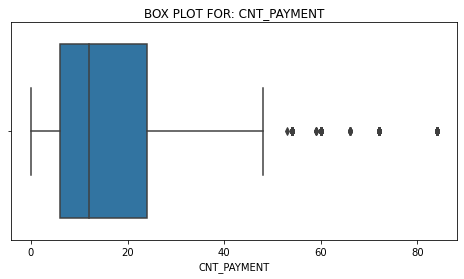

In [128]:
prev_box_plot('AMT_ANNUITY')
prev_box_plot('AMT_APPLICATION')
prev_box_plot('AMT_CREDIT')
prev_box_plot('AMT_GOODS_PRICE')
prev_box_plot('CNT_PAYMENT')

## Bivariate analysis - prev_appl_data

In [129]:
prev_appl_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,267295.5,WEDNESDAY,12,Y,1,XAP,Approved,-544,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,87750.0,TUESDAY,15,Y,1,XAP,Approved,-1694,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,105237.0,MONDAY,12,Y,1,XAP,Approved,-1488,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,180000.0,WEDNESDAY,9,Y,1,XNA,Approved,-1185,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low


In [133]:
prev_catg_cols

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [134]:
prev_num_cols

Index(['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA',
       'CNT_PAYMENT'],
      dtype='object')

In [145]:
# Lets create a function to plot bar charts by using subplot
def prev_bar_plot(colx,coly,hue):
    plt.figure(figsize=[10,6])
    sns.barplot(data=prev_appl_data,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=90)
    plt.ylabel(coly)
    plt.title('BAR PLOT FOR: '+colx+' vs '+coly)
    plt.show()

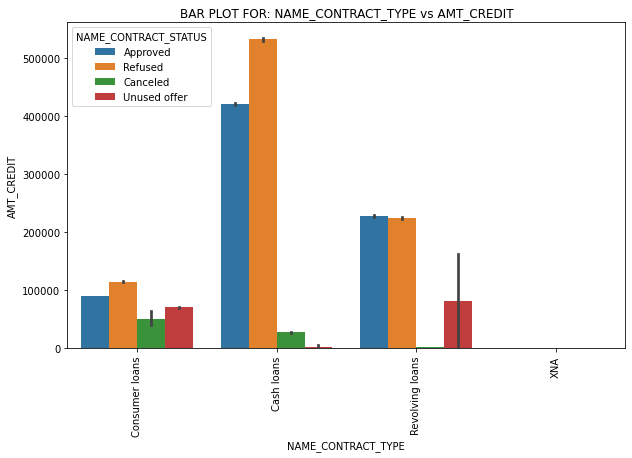

In [146]:
prev_bar_plot('NAME_CONTRACT_TYPE','AMT_CREDIT','NAME_CONTRACT_STATUS')

###### Refused rate is high in cash loan contract type, and also approved in same contract type with highest loan credit amount.

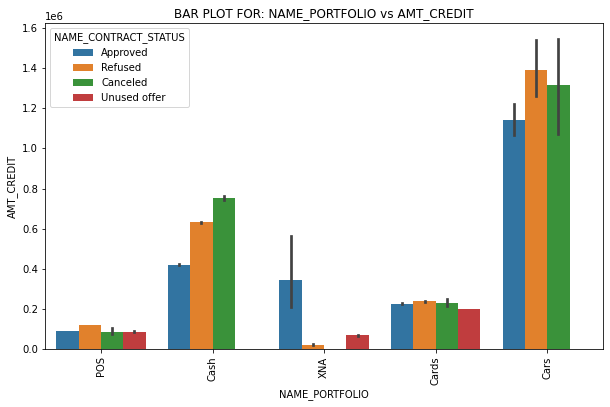

In [147]:
prev_bar_plot('NAME_PORTFOLIO','AMT_CREDIT','NAME_CONTRACT_STATUS')

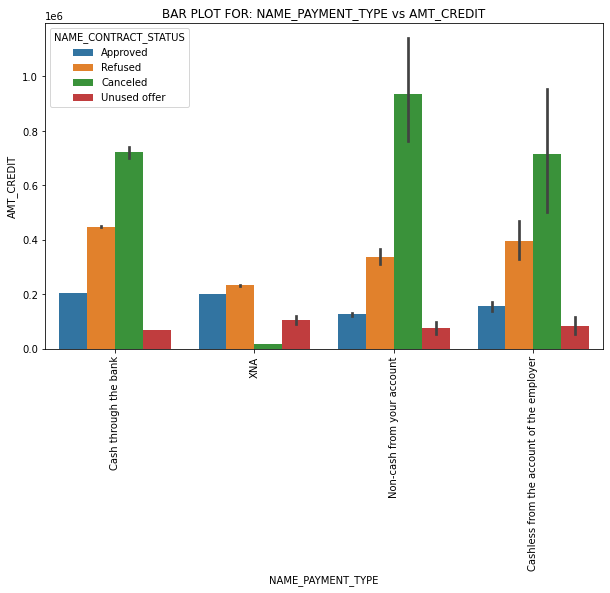

In [148]:
prev_bar_plot('NAME_PAYMENT_TYPE','AMT_CREDIT','NAME_CONTRACT_STATUS')

##### Lets create a new dataframe which contains some important features from prev_appl_data for analysis purpose

In [159]:
prev_appl_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [185]:
prev_appl_data_new = prev_appl_data[['SK_ID_CURR','NAME_CONTRACT_STATUS','AMT_CREDIT','AMT_GOODS_PRICE','AMT_APPLICATION','AMT_ANNUITY','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_PORTFOLIO']]

In [186]:
prev_appl_data_new.head()

,SK_ID_CURR,NAME_CONTRACT_STATUS,AMT_CREDIT,AMT_GOODS_PRICE,AMT_APPLICATION,AMT_ANNUITY,NAME_CLIENT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,NAME_PORTFOLIO
0,271877,Approved,17145.0,17145.0,17145.0,1730.430,Repeater,XAP,Cash through the bank,POS
1,108129,Approved,679671.0,607500.0,607500.0,25188.615,Repeater,XNA,XNA,Cash
2,122040,Approved,136444.5,112500.0,112500.0,15060.735,Repeater,XNA,Cash through the bank,Cash
3,176158,Approved,470790.0,450000.0,450000.0,47041.335,Repeater,XNA,Cash through the bank,Cash
4,202054,Refused,404055.0,337500.0,337500.0,31924.395,Repeater,Repairs,Cash through the bank,Cash


In [187]:
prev_appl_data_new.shape

(1670214, 10)

## Merge the dataframes 

In [224]:
merged_data = appl_data_new[['SK_ID_CURR','TARGET','CODE_GENDER','NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','OCCUPATION_TYPE']].merge(prev_appl_data_new,on='SK_ID_CURR',how='inner')

In [225]:
merged_data.head()

,SK_ID_CURR,TARGET,CODE_GENDER,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,AMT_CREDIT,AMT_GOODS_PRICE,AMT_APPLICATION,AMT_ANNUITY,NAME_CLIENT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_PAYMENT_TYPE,NAME_PORTFOLIO
0,100002,1,M,Cash loans,202500.0,Working,Secondary / secondary special,Laborers,Approved,179055.0,179055.0,179055.0,9251.775,New,XAP,XNA,POS
1,100003,0,F,Cash loans,270000.0,State servant,Higher education,Core staff,Approved,1035882.0,900000.0,900000.0,98356.995,Repeater,XNA,XNA,Cash
2,100003,0,F,Cash loans,270000.0,State servant,Higher education,Core staff,Approved,348637.5,337500.0,337500.0,64567.665,Refreshed,XAP,Cash through the bank,POS
3,100003,0,F,Cash loans,270000.0,State servant,Higher education,Core staff,Approved,68053.5,68809.5,68809.5,6737.310,Refreshed,XAP,Cash through the bank,POS
4,100004,0,M,Revolving loans,67500.0,Working,Secondary / secondary special,Laborers,Approved,20106.0,24282.0,24282.0,5357.250,New,XAP,Cash through the bank,POS


In [226]:
merged_data.shape

(1413646, 17)

In [227]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1413646 non-null  int64  
 1   TARGET                  1413646 non-null  int64  
 2   CODE_GENDER             1413646 non-null  object 
 3   NAME_CONTRACT_TYPE      1413646 non-null  object 
 4   AMT_INCOME_TOTAL        1413646 non-null  float64
 5   NAME_INCOME_TYPE        1413646 non-null  object 
 6   NAME_EDUCATION_TYPE     1413646 non-null  object 
 7   OCCUPATION_TYPE         1413646 non-null  object 
 8   NAME_CONTRACT_STATUS    1413646 non-null  object 
 9   AMT_CREDIT              1413645 non-null  float64
 10  AMT_GOODS_PRICE         1094130 non-null  float64
 11  AMT_APPLICATION         1413646 non-null  float64
 12  AMT_ANNUITY             1106438 non-null  float64
 13  NAME_CLIENT_TYPE        1413646 non-null  object 
 14  NA

In [229]:
# Percentage of missing values in merged_data
100*(merged_data.isnull().mean())

SK_ID_CURR                 0.000000
TARGET                     0.000000
CODE_GENDER                0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_INCOME_TOTAL           0.000000
NAME_INCOME_TYPE           0.000000
NAME_EDUCATION_TYPE        0.000000
OCCUPATION_TYPE            0.000000
NAME_CONTRACT_STATUS       0.000000
AMT_CREDIT                 0.000071
AMT_GOODS_PRICE           22.602264
AMT_APPLICATION            0.000000
AMT_ANNUITY               21.731607
NAME_CLIENT_TYPE           0.000000
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_PAYMENT_TYPE          0.000000
NAME_PORTFOLIO             0.000000
dtype: float64

In [230]:
# Categorical features in merged_data
merged_catg_col = merged_data.select_dtypes(object).columns

In [231]:
merged_catg_col

Index(['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS',
       'NAME_CLIENT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE',
       'NAME_PORTFOLIO'],
      dtype='object')

In [232]:
# Numerical features in merged_data
merged_num_col = merged_data.select_dtypes([int,float]).columns

In [233]:
merged_num_col

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_GOODS_PRICE', 'AMT_APPLICATION', 'AMT_ANNUITY'],
      dtype='object')

In [234]:
# Lets create a function to plot bar charts by using subplot
def merged_bar_plot(colx,coly,hue):
    plt.figure(figsize=[15,6])
    sns.barplot(data=merged_data,x=colx,y=coly,hue=hue)
    plt.xlabel(colx)
    plt.xticks(rotation=90)
    plt.ylabel(coly)
    plt.title('BAR PLOT FOR: '+colx+' vs '+coly)
    plt.show()

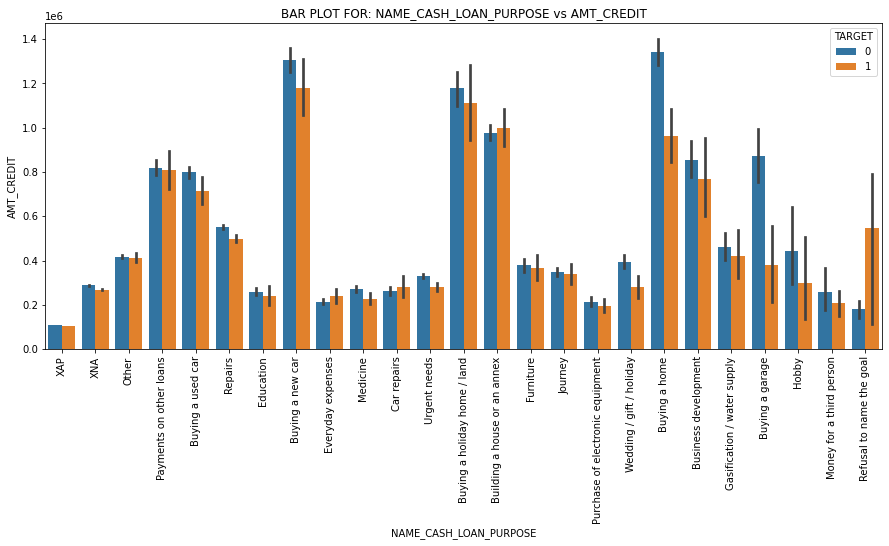

In [235]:
# NAME_CASH_LOAN_PURPOSE vs AMT_CREDIT(previous application data) bassed on TARGET
merged_bar_plot('NAME_CASH_LOAN_PURPOSE','AMT_CREDIT','TARGET')

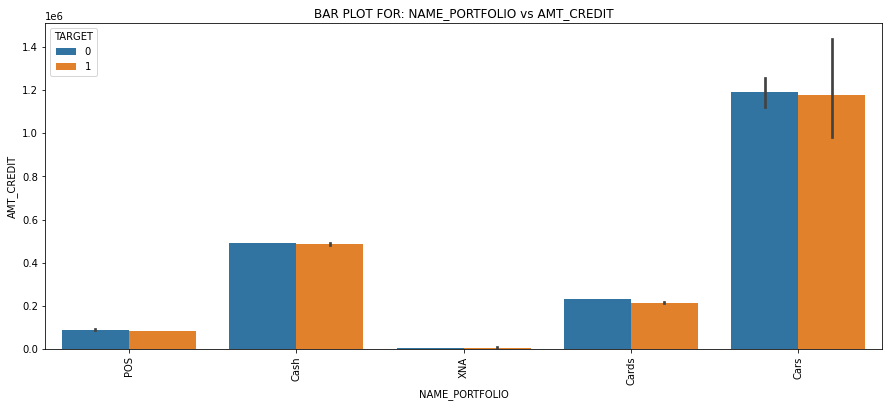

In [251]:
# NAME_PORTFOLIO vs AMT_CREDIT(previous application data) bassed on TARGET
merged_bar_plot('NAME_PORTFOLIO','AMT_CREDIT','TARGET')

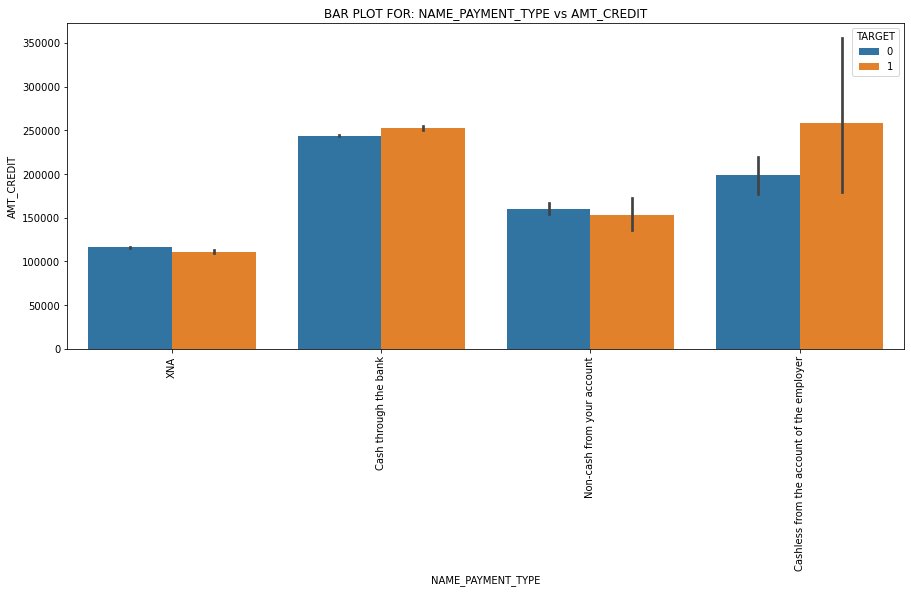

In [252]:
# NAME_PAYMENT_TYPE vs AMT_CREDIT(previous application data) bassed on NAME_CONTRACT_STATUS
merged_bar_plot('NAME_PAYMENT_TYPE','AMT_CREDIT','TARGET')

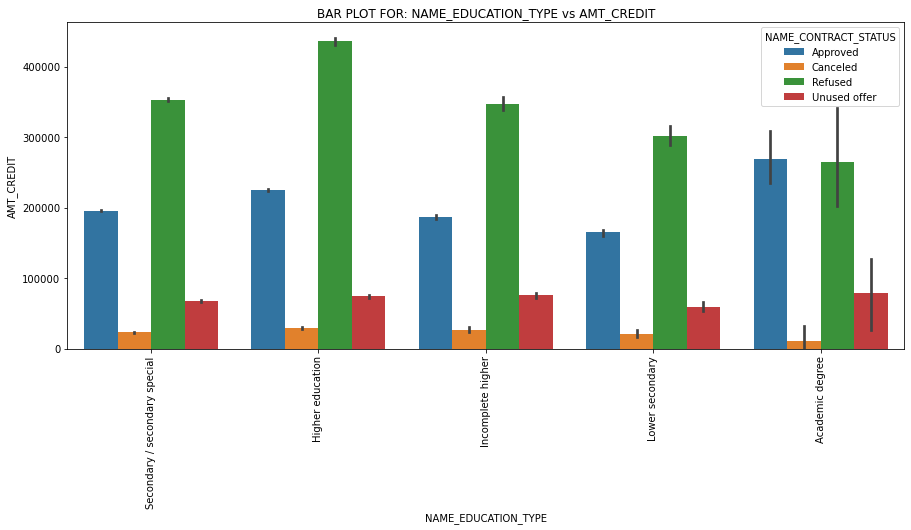

In [238]:
# NAME_EDUCATION_TYPE vs AMT_CREDIT(previous application data) bassed on NAME_CONTRACT_STATUS
merged_bar_plot('NAME_EDUCATION_TYPE','AMT_CREDIT','NAME_CONTRACT_STATUS')

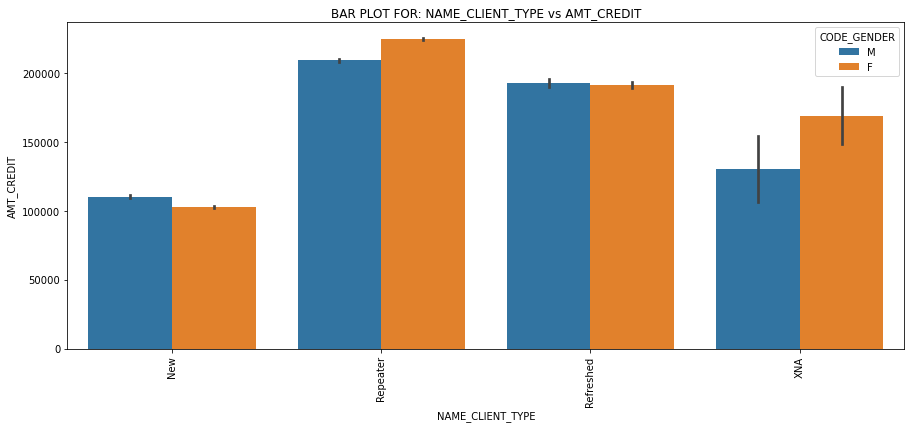

In [253]:
# NAME_CLIENT_TYPE vs AMT_CREDIT(previous application data) bassed on CODE_GENDER
merged_bar_plot('NAME_CLIENT_TYPE','AMT_CREDIT','CODE_GENDER')